In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix,classification_report
from functools import partial
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [2]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-49.000000,40,-121,1248.468750,35.333677,60.410833,51.500000,3.0,161,...,10.039375,749.133121,401.868267,5.687177,3.065411,396.901626,407.636343,6.799307,-0.451582,410.023970
2,0,-48.437500,50,-90,763.183594,27.625778,55.761770,52.187500,1.0,140,...,2.147757,422.762913,472.885439,6.117379,4.352043,431.871326,583.876629,7.485470,0.887373,579.969943
3,0,-52.390625,40,-161,1289.019287,35.902915,63.512179,55.203125,2.0,201,...,18.137231,1518.442726,394.170673,5.880113,4.005669,397.543734,579.901794,7.172086,1.296841,631.137687
4,0,-58.656250,20,-141,675.444336,25.989312,64.156060,59.281250,1.0,161,...,4.501930,350.988400,300.569947,6.165776,2.724835,284.665987,453.666990,8.852153,-0.730138,471.165346
5,0,-62.484375,20,-151,936.156006,30.596667,69.573365,63.421875,2.0,171,...,15.865800,949.672028,480.210202,5.163164,5.378842,474.842192,285.089063,8.529474,-1.408363,293.566347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,1,222.437500,1434,-727,78349.433594,279.909688,357.530243,262.156250,2.5,2161,...,12.935339,6271.213303,2802.484776,5.075895,5.038302,2843.818272,2498.963425,5.765893,6.334875,2552.290621
10733,1,216.515625,505,-10,14667.718506,121.110357,248.086143,216.828125,1.0,515,...,13.996516,4810.255053,6928.132399,4.116273,8.178561,7209.925448,685.125459,9.041982,-0.895666,711.185049
10734,1,188.937500,717,-515,42958.714844,207.264842,280.456937,243.468750,3.5,1232,...,7.172633,6693.714654,8260.990750,4.538237,5.638221,7968.740587,8686.995478,7.452841,1.958395,8787.361905
10735,1,189.593750,808,-161,20231.084961,142.236019,237.016613,198.093750,1.0,969,...,0.924205,6445.305296,2992.839786,5.803887,3.385697,3059.795809,4689.600309,6.708810,2.201441,4618.482034


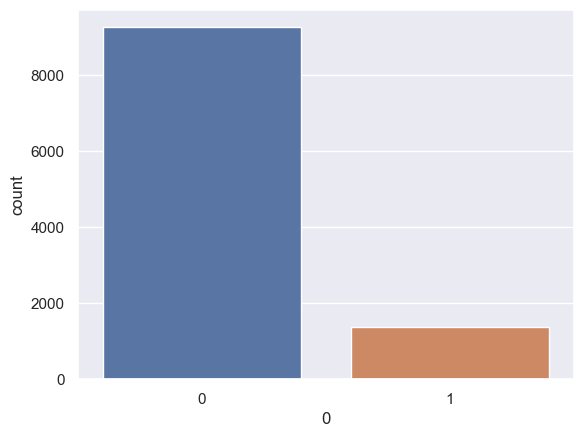

In [3]:
X_train = combined_1.drop('0', axis=1)
y_train = combined_1['0']

sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [4]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

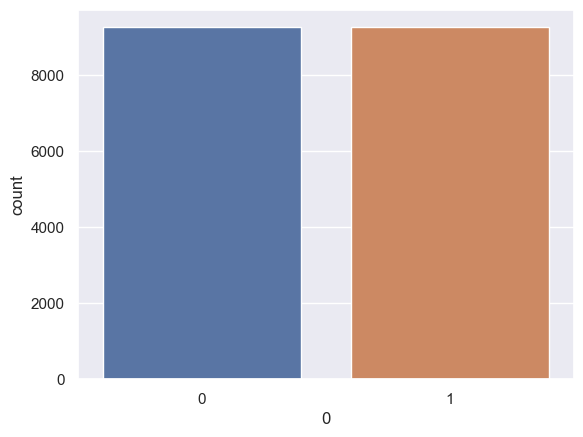

In [5]:
sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [7]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,52.343750,80,10,158.569336,12.592432,53.837139,52.343750,0.0,70,...,-0.947053,82.927930,123.961725,8.780663,-1.138564,122.554696,115.345281,8.569376,-1.122918,120.572506
2,0,9.218750,282,-727,30670.452148,175.129815,175.372283,111.656250,0.5,1009,...,10.995737,683.182233,663.375453,4.525781,13.276784,661.316076,286.931483,9.897683,-0.994607,295.780998
3,0,147.984375,1030,-828,81013.077881,284.627964,320.799709,201.578125,3.0,1858,...,5.699194,3279.225719,6122.267187,5.052353,1.920478,6558.514019,3313.406423,6.587781,4.299474,3334.297161
4,0,167.078125,1838,-1272,452212.478271,672.467455,692.912388,426.609375,5.0,3110,...,4.955668,20044.366447,25737.966966,5.629323,-0.516381,25548.637321,5797.389091,6.479398,-0.531162,5870.718010
5,0,145.203125,1515,-2292,350451.599365,591.989526,609.537158,400.609375,4.0,3807,...,8.761061,5166.782355,13112.162114,4.049550,4.732778,13865.295647,2768.599259,5.409020,7.736401,2624.729593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,1,242.250000,2848,-1181,327142.093750,571.963367,621.149866,367.156250,3.0,4029,...,3.584311,14651.951783,21151.398069,6.277861,0.883775,21361.361570,8098.965874,7.657653,0.165531,8014.746988
1680,1,334.640625,2616,-939,300198.136475,547.903401,642.014396,431.171875,2.0,3555,...,17.804934,6753.460860,7302.111771,3.780667,7.219301,7446.247857,2691.128789,7.695633,-0.262886,2824.954003
1681,1,373.515625,3616,-1757,650379.812256,806.461290,888.759661,558.359375,4.0,5373,...,22.147079,8721.484677,7563.168185,4.492189,1.965671,7727.781379,2745.258900,6.347818,3.202689,2665.622007
1682,1,402.265625,4111,-1747,902242.913818,949.864682,1031.533105,621.828125,4.0,5858,...,22.837088,11586.049003,4801.245306,5.257542,8.880867,4621.252143,6055.613588,6.643926,0.842814,6058.026124


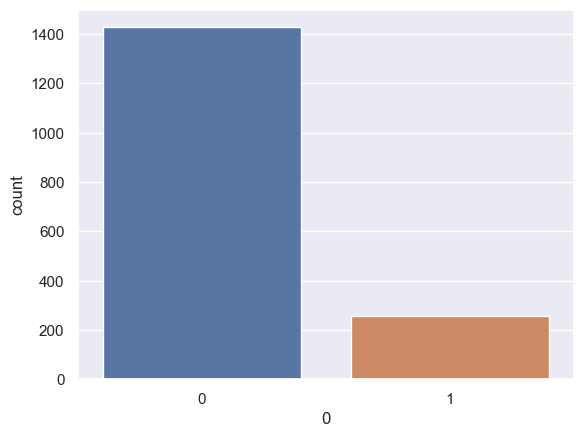

In [8]:
X_test = combined_1.drop('0', axis=1)
y_test = combined_1['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [9]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

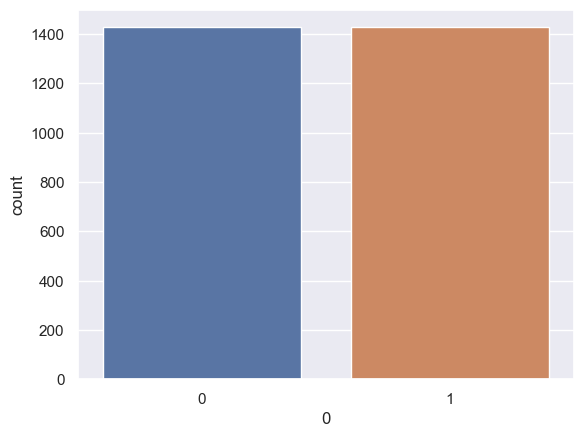

In [10]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [11]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [2]:
def objective(trial):
    
    # Define the hyperparameters to be tuned
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 1, 7)
    
    # Additional hyperparameters
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)  # applicable for 'rbf', 'poly', 'sigmoid'
    shrinking = trial.suggest_categorical('shrinking', [True, False])
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])
    
    try:
        
        model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma,
                    shrinking=shrinking, tol=tol, decision_function_shape=decision_function_shape, random_state=42, verbose=2)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the accuracy as the objective to be optimized
        accuracy = accuracy_score(y_test, y_pred)
        sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
        specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])

        alpha = trial.suggest_float('alpha', 0.0, 1.0)

        f1 = (2*sensitivity*specificity)/(sensitivity+specificity)
        mcc = matthews_corrcoef(y_test, y_pred)
        return alpha * f1 + (1 - alpha) * mcc
    
    except ValueError as e:
        
        print(f'Trial failed with error: {e}')
        return float('nan')  # You can also use None
        

In [ ]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150, n_jobs = 16)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Accuracy on Test Set:", final_accuracy)

[I 2023-12-17 14:55:17,064] A new study created in memory with name: no-name-a0d747af-8184-4d54-9c9a-2f3d01b16b9e


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[I 2023-12-17 14:57:07,175] Trial 7 finished with value: 0.5857406566258843 and parameters: {'C': 31248.341633762695, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.0016306526980954968, 'shrinking': False, 'tol': 0.005254265152924206, 'decision_function_shape': 'ovr', 'alpha': 0.16104860939312915}. Best is trial 7 with value: 0.5857406566258843.


[LibSVM]

[I 2023-12-17 14:57:44,926] Trial 15 finished with value: 0.5844052539644766 and parameters: {'C': 0.00037259149521377306, 'kernel': 'poly', 'degree': 2, 'gamma': 48171.96150186199, 'shrinking': False, 'tol': 1.934047145785666e-05, 'decision_function_shape': 'ovr', 'alpha': 0.2830740489625134}. Best is trial 7 with value: 0.5857406566258843.


[LibSVM]

[I 2023-12-17 14:58:09,062] Trial 6 finished with value: 0.5821587943173606 and parameters: {'C': 0.042983480249559655, 'kernel': 'poly', 'degree': 4, 'gamma': 0.142235866732161, 'shrinking': True, 'tol': 0.018494685813834715, 'decision_function_shape': 'ovr', 'alpha': 0.014678888634524045}. Best is trial 7 with value: 0.5857406566258843.


[LibSVM]

[I 2023-12-17 14:58:53,057] Trial 1 finished with value: 0.8727535817608916 and parameters: {'C': 0.00016841168661856543, 'kernel': 'linear', 'degree': 3, 'gamma': 0.023786349479718236, 'shrinking': False, 'tol': 0.000491628214195686, 'decision_function_shape': 'ovr', 'alpha': 0.0969642794614679}. Best is trial 1 with value: 0.8727535817608916.


[LibSVM]

[I 2023-12-17 14:59:17,713] Trial 9 finished with value: 0.6448878610928146 and parameters: {'C': 9.08443811933337, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 1.651934340032893, 'shrinking': True, 'tol': 0.00019524154052178079, 'decision_function_shape': 'ovo', 'alpha': 0.4535750862368213}. Best is trial 1 with value: 0.8727535817608916.


[LibSVM]

[I 2023-12-17 14:59:31,608] Trial 5 finished with value: 0.8960103180807035 and parameters: {'C': 4.827384866310019e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00027612048091527964, 'shrinking': False, 'tol': 0.019986288295016284, 'decision_function_shape': 'ovr', 'alpha': 0.5777704199853778}. Best is trial 5 with value: 0.8960103180807035.


[LibSVM]

[I 2023-12-17 14:59:40,492] Trial 4 finished with value: 0.9217128939022767 and parameters: {'C': 3.567155505719986e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 0.00033208899337138544, 'shrinking': False, 'tol': 0.044543965407165785, 'decision_function_shape': 'ovr', 'alpha': 0.9822830380675334}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:00:31,108] Trial 10 finished with value: 0.5549248997594542 and parameters: {'C': 10486.210130492795, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.020034110769181247, 'shrinking': False, 'tol': 8.570724653244783e-05, 'decision_function_shape': 'ovr', 'alpha': 0.22988319484358588}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:00:33,409] Trial 3 finished with value: 0.7558722129912734 and parameters: {'C': 0.0015686973234343557, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 48.70664080040099, 'shrinking': True, 'tol': 2.4742840427608726e-05, 'decision_function_shape': 'ovo', 'alpha': 0.33079234402382274}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:02:00,080] Trial 0 finished with value: 0.0 and parameters: {'C': 0.002221211245554328, 'kernel': 'poly', 'degree': 7, 'gamma': 0.0005787559706469166, 'shrinking': False, 'tol': 0.0001239191974177813, 'decision_function_shape': 'ovr', 'alpha': 0.991841031641068}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:02:41,259] Trial 11 finished with value: 0.3853958340765926 and parameters: {'C': 1.5301376004979988e-05, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 0.0011662377576667844, 'shrinking': True, 'tol': 0.00034971328273307315, 'decision_function_shape': 'ovr', 'alpha': 0.3716984294797374}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:02:41,775] Trial 14 finished with value: 0.0 and parameters: {'C': 0.07203855231589867, 'kernel': 'rbf', 'degree': 7, 'gamma': 2.7258381791277646, 'shrinking': False, 'tol': 0.005767063401638323, 'decision_function_shape': 'ovo', 'alpha': 0.9466163779575005}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:02:44,493] Trial 2 finished with value: 0.0 and parameters: {'C': 3.2093646596765374e-05, 'kernel': 'rbf', 'degree': 4, 'gamma': 614.0855714834358, 'shrinking': True, 'tol': 3.139793464748518e-05, 'decision_function_shape': 'ovr', 'alpha': 0.4901200105943755}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:03:05,699] Trial 23 finished with value: 0.8358351696227979 and parameters: {'C': 549.3837444904677, 'kernel': 'rbf', 'degree': 5, 'gamma': 2.5251619326544553e-05, 'shrinking': False, 'tol': 0.011576944176825893, 'decision_function_shape': 'ovr', 'alpha': 0.5928411666542882}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:03:14,832] Trial 16 finished with value: 0.6248742248945677 and parameters: {'C': 6342.533684821053, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 0.02294155836292898, 'shrinking': False, 'tol': 9.497442016151371e-05, 'decision_function_shape': 'ovo', 'alpha': 0.6795542608939555}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:04:25,409] Trial 17 finished with value: 0.2885957998698788 and parameters: {'C': 4.260514030713785e-05, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 8.273212292577644e-05, 'shrinking': True, 'tol': 2.6900289909559907e-05, 'decision_function_shape': 'ovo', 'alpha': 0.6668166479055079}. Best is trial 4 with value: 0.9217128939022767.


[LibSVM]

[I 2023-12-17 15:04:38,894] Trial 25 finished with value: 0.9235199433539614 and parameters: {'C': 13.55703271391789, 'kernel': 'rbf', 'degree': 6, 'gamma': 1.645411541886411e-05, 'shrinking': True, 'tol': 0.0028659761873271795, 'decision_function_shape': 'ovo', 'alpha': 0.9554720372722074}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:04:46,887] Trial 18 finished with value: 0.0 and parameters: {'C': 0.0012915491124390187, 'kernel': 'rbf', 'degree': 1, 'gamma': 8812.236076578965, 'shrinking': False, 'tol': 0.0009658373270229095, 'decision_function_shape': 'ovo', 'alpha': 0.5607314145280733}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:05:22,741] Trial 19 finished with value: 0.0 and parameters: {'C': 55041.454292063245, 'kernel': 'rbf', 'degree': 5, 'gamma': 2529.989239248414, 'shrinking': True, 'tol': 0.05218496513294981, 'decision_function_shape': 'ovo', 'alpha': 0.25423071494893845}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:05:32,508] Trial 21 finished with value: 0.0 and parameters: {'C': 0.37149455417978294, 'kernel': 'rbf', 'degree': 5, 'gamma': 14766.06467858826, 'shrinking': False, 'tol': 6.46408440620257e-05, 'decision_function_shape': 'ovr', 'alpha': 0.6962868304900016}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:11:36,091] Trial 8 finished with value: 0.0 and parameters: {'C': 5.941188205587043, 'kernel': 'rbf', 'degree': 7, 'gamma': 1896.904724432023, 'shrinking': False, 'tol': 0.0007381908476527325, 'decision_function_shape': 'ovr', 'alpha': 0.3906295687102972}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:13:06,520] Trial 13 finished with value: 0.0 and parameters: {'C': 445.2556706770244, 'kernel': 'rbf', 'degree': 4, 'gamma': 194.1239331596017, 'shrinking': False, 'tol': 0.0009817135556959686, 'decision_function_shape': 'ovr', 'alpha': 0.15632062886025577}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:15:43,675] Trial 24 finished with value: 0.0 and parameters: {'C': 46265.20745558331, 'kernel': 'rbf', 'degree': 3, 'gamma': 105.95614088089744, 'shrinking': True, 'tol': 0.00035275189866893413, 'decision_function_shape': 'ovo', 'alpha': 0.9430091746610367}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:17:13,906] Trial 12 finished with value: 0.0 and parameters: {'C': 5.350604626685697, 'kernel': 'rbf', 'degree': 2, 'gamma': 1.0270146732170713, 'shrinking': False, 'tol': 0.00014768782319890116, 'decision_function_shape': 'ovr', 'alpha': 0.03514210553912789}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:18:17,148] Trial 38 finished with value: 0.847792516722521 and parameters: {'C': 0.018161603483218887, 'kernel': 'linear', 'degree': 1, 'gamma': 1.1471458646595157e-05, 'shrinking': True, 'tol': 0.08442777767291551, 'decision_function_shape': 'ovo', 'alpha': 0.8268115853892462}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:19:26,108] Trial 39 finished with value: 0.8454589460179145 and parameters: {'C': 0.016950056501387048, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00011736006837955408, 'shrinking': True, 'tol': 0.09897671115347449, 'decision_function_shape': 'ovo', 'alpha': 0.8013062647318139}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:35:10,368] Trial 29 finished with value: 0.8156544378064057 and parameters: {'C': 3.439418991487447, 'kernel': 'linear', 'degree': 1, 'gamma': 1.0944277628393123e-05, 'shrinking': False, 'tol': 0.09823455201607875, 'decision_function_shape': 'ovo', 'alpha': 0.7416346563424789}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:42:03,812] Trial 42 finished with value: 0.8345516140633216 and parameters: {'C': 0.28644315048410945, 'kernel': 'linear', 'degree': 6, 'gamma': 0.0003283143236880183, 'shrinking': False, 'tol': 0.0025042172772543406, 'decision_function_shape': 'ovr', 'alpha': 0.8761391796387242}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:50:58,334] Trial 36 finished with value: 0.8365642134579337 and parameters: {'C': 7.093624316826272, 'kernel': 'linear', 'degree': 1, 'gamma': 1.164310676502662e-05, 'shrinking': True, 'tol': 0.04600275262450765, 'decision_function_shape': 'ovo', 'alpha': 0.8306360361277739}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:52:00,325] Trial 26 finished with value: 0.8242586880343447 and parameters: {'C': 6.262208904960874, 'kernel': 'linear', 'degree': 1, 'gamma': 4.776029353788732e-05, 'shrinking': False, 'tol': 0.09500173203028514, 'decision_function_shape': 'ovo', 'alpha': 0.7534983033698487}. Best is trial 25 with value: 0.9235199433539614.


[LibSVM]

[I 2023-12-17 15:55:09,899] Trial 45 finished with value: 0.9301984845736079 and parameters: {'C': 0.000124316157116653, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0058915136640848515, 'shrinking': False, 'tol': 0.017304996982873175, 'decision_function_shape': 'ovr', 'alpha': 0.9910521782538464}. Best is trial 45 with value: 0.9301984845736079.


[LibSVM]

[I 2023-12-17 15:57:59,785] Trial 30 finished with value: 0.8298053241093785 and parameters: {'C': 6.53991262069177, 'kernel': 'linear', 'degree': 1, 'gamma': 1.866698969901826e-05, 'shrinking': False, 'tol': 0.07624009836079008, 'decision_function_shape': 'ovr', 'alpha': 0.7950622493446401}. Best is trial 45 with value: 0.9301984845736079.


[LibSVM]

[I 2023-12-17 15:58:01,640] Trial 46 finished with value: 0.9297363688651454 and parameters: {'C': 0.00014123262858528008, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0004092867254377466, 'shrinking': False, 'tol': 0.02134631877742725, 'decision_function_shape': 'ovr', 'alpha': 0.9729746940914341}. Best is trial 45 with value: 0.9301984845736079.


[LibSVM]

[I 2023-12-17 16:00:47,818] Trial 47 finished with value: 0.9307961453572012 and parameters: {'C': 0.0002768289670756713, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0025287354152433747, 'shrinking': False, 'tol': 0.021406227850316924, 'decision_function_shape': 'ovr', 'alpha': 0.9959737752570867}. Best is trial 47 with value: 0.9307961453572012.


[LibSVM]

[I 2023-12-17 16:00:48,318] Trial 48 finished with value: 0.9310558843214825 and parameters: {'C': 0.00028268085572013575, 'kernel': 'linear', 'degree': 5, 'gamma': 0.003292977915331436, 'shrinking': False, 'tol': 0.02694226223283353, 'decision_function_shape': 'ovr', 'alpha': 0.9998026797061915}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:03:34,983] Trial 49 finished with value: 0.923830375435249 and parameters: {'C': 0.0002574352623844606, 'kernel': 'linear', 'degree': 5, 'gamma': 0.006149055883770503, 'shrinking': False, 'tol': 0.002242896245250951, 'decision_function_shape': 'ovr', 'alpha': 0.8991120110542612}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:03:41,208] Trial 50 finished with value: 0.9236178635832546 and parameters: {'C': 0.00018299639630268185, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0059221103641292515, 'shrinking': False, 'tol': 0.021554345590412412, 'decision_function_shape': 'ovr', 'alpha': 0.8863381857222556}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:05:26,328] Trial 51 finished with value: 0.8825789064626687 and parameters: {'C': 0.004638800617555115, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0937568322958009, 'shrinking': False, 'tol': 0.022808115625674304, 'decision_function_shape': 'ovr', 'alpha': 0.8918605123527837}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:05:45,311] Trial 52 finished with value: 0.8965497199705087 and parameters: {'C': 0.0041372767288384085, 'kernel': 'linear', 'degree': 5, 'gamma': 0.06506307146709903, 'shrinking': False, 'tol': 0.010506215346142414, 'decision_function_shape': 'ovr', 'alpha': 0.9983097620490023}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:09:35,928] Trial 53 finished with value: 0.11501136255436571 and parameters: {'C': 0.0014511937611678025, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0035384732651198387, 'shrinking': False, 'tol': 0.010872878698147952, 'decision_function_shape': 'ovr', 'alpha': 0.9777605421226742}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:10:07,151] Trial 54 finished with value: 0.061135581289059736 and parameters: {'C': 0.0008382003855376618, 'kernel': 'poly', 'degree': 6, 'gamma': 0.003188953482216733, 'shrinking': False, 'tol': 0.03134240674638298, 'decision_function_shape': 'ovr', 'alpha': 0.9984863319477199}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:10:21,158] Trial 28 finished with value: 0.8271099685366113 and parameters: {'C': 8.734008750403236, 'kernel': 'linear', 'degree': 1, 'gamma': 2.4518166929265615e-05, 'shrinking': False, 'tol': 0.07879874617520077, 'decision_function_shape': 'ovr', 'alpha': 0.737962747947378}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:12:22,726] Trial 55 finished with value: 0.9240687464547153 and parameters: {'C': 0.00010847607181204323, 'kernel': 'linear', 'degree': 4, 'gamma': 14.443422286213845, 'shrinking': False, 'tol': 0.031157663853199395, 'decision_function_shape': 'ovr', 'alpha': 0.9173185536352214}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:12:55,710] Trial 56 finished with value: 0.9237956897341062 and parameters: {'C': 0.00011409949974678607, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0081707896454385, 'shrinking': False, 'tol': 0.005240018838703797, 'decision_function_shape': 'ovr', 'alpha': 0.9070834101913787}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:13:08,463] Trial 57 finished with value: 0.9256072917395017 and parameters: {'C': 0.000126950820776879, 'kernel': 'linear', 'degree': 5, 'gamma': 0.2559650998158149, 'shrinking': False, 'tol': 0.0020143596742656323, 'decision_function_shape': 'ovr', 'alpha': 0.9168062600964922}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:13:11,472] Trial 35 finished with value: 0.8431682578266235 and parameters: {'C': 13.59595692265652, 'kernel': 'linear', 'degree': 6, 'gamma': 2.6707664670063675e-05, 'shrinking': True, 'tol': 0.08801492623515224, 'decision_function_shape': 'ovo', 'alpha': 0.8440733028356252}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:16:13,217] Trial 34 finished with value: 0.8445739128352328 and parameters: {'C': 14.441078431076516, 'kernel': 'linear', 'degree': 6, 'gamma': 1.19953022715049e-05, 'shrinking': True, 'tol': 0.06721187550647516, 'decision_function_shape': 'ovo', 'alpha': 0.8553412586707869}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:16:40,829] Trial 58 finished with value: 0.8839396646128227 and parameters: {'C': 1.1868453983298842e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 11.90706039710811, 'shrinking': False, 'tol': 0.007738350758403124, 'decision_function_shape': 'ovr', 'alpha': 0.916036518640198}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:17:12,498] Trial 59 finished with value: 0.9065178253524118 and parameters: {'C': 1.8084552248377187e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 8.046680524322795, 'shrinking': False, 'tol': 0.03100998395314685, 'decision_function_shape': 'ovr', 'alpha': 0.8542825606016422}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:17:19,852] Trial 61 finished with value: 0.9184500264604989 and parameters: {'C': 2.482692383490708e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 0.0012101158474086956, 'shrinking': False, 'tol': 0.0133547011017961, 'decision_function_shape': 'ovr', 'alpha': 0.9451758030533393}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:17:33,960] Trial 60 finished with value: 0.899591988700168 and parameters: {'C': 1.5475462533705676e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 0.32316625347396544, 'shrinking': False, 'tol': 0.007115878509443663, 'decision_function_shape': 'ovr', 'alpha': 0.8622588573773681}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:17:41,347] Trial 31 finished with value: 0.836248093419008 and parameters: {'C': 9.241556589346587, 'kernel': 'linear', 'degree': 1, 'gamma': 2.3801030009886243e-05, 'shrinking': False, 'tol': 0.09963369014035171, 'decision_function_shape': 'ovr', 'alpha': 0.8244362165213054}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:17:43,426] Trial 33 finished with value: 0.8441476075273568 and parameters: {'C': 14.969664444831569, 'kernel': 'linear', 'degree': 5, 'gamma': 1.2070963502571887e-05, 'shrinking': True, 'tol': 0.05410318492865718, 'decision_function_shape': 'ovo', 'alpha': 0.8471876480493569}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:19:57,972] Trial 63 finished with value: 0.9197361076669123 and parameters: {'C': 0.0005477965112136969, 'kernel': 'linear', 'degree': 4, 'gamma': 0.3371577055457674, 'shrinking': False, 'tol': 0.014687790354595318, 'decision_function_shape': 'ovr', 'alpha': 0.9638796413543534}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:20:18,068] Trial 64 finished with value: 0.9174457912440264 and parameters: {'C': 0.0005853515109544999, 'kernel': 'linear', 'degree': 7, 'gamma': 0.33490163468351924, 'shrinking': False, 'tol': 0.015241191084039705, 'decision_function_shape': 'ovr', 'alpha': 0.9579260496224554}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:20:28,663] Trial 65 finished with value: 0.9257836827744481 and parameters: {'C': 0.00040463983746979125, 'kernel': 'linear', 'degree': 5, 'gamma': 0.21973932568268234, 'shrinking': False, 'tol': 0.0015489280386098776, 'decision_function_shape': 'ovr', 'alpha': 0.9639271699536838}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:21:03,258] Trial 66 finished with value: 0.925065613645774 and parameters: {'C': 0.00011157991152437742, 'kernel': 'linear', 'degree': 5, 'gamma': 0.21382951327146865, 'shrinking': False, 'tol': 0.030629933033417402, 'decision_function_shape': 'ovr', 'alpha': 0.9315361204441274}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:21:09,558] Trial 67 finished with value: 0.9249567294829864 and parameters: {'C': 0.00010899255298948533, 'kernel': 'linear', 'degree': 3, 'gamma': 0.40184985054464345, 'shrinking': False, 'tol': 0.033735340140067446, 'decision_function_shape': 'ovr', 'alpha': 0.9299381127124033}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:21:11,726] Trial 62 finished with value: 0.8793437089115441 and parameters: {'C': 1.1231257340794243e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 0.3474612145898579, 'shrinking': False, 'tol': 0.00721903042662783, 'decision_function_shape': 'ovr', 'alpha': 0.9371414027044118}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:21:18,181] Trial 68 finished with value: 0.9236616188547435 and parameters: {'C': 8.384004635891597e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.379003376849953, 'shrinking': False, 'tol': 0.0348731218136778, 'decision_function_shape': 'ovr', 'alpha': 0.9402844572872436}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:23:19,093] Trial 72 finished with value: 0.7509173358948322 and parameters: {'C': 5.064490081726696e-05, 'kernel': 'poly', 'degree': 5, 'gamma': 0.04182079699330803, 'shrinking': False, 'tol': 0.004582333648627341, 'decision_function_shape': 'ovr', 'alpha': 0.9995989369395534}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:24:46,564] Trial 73 finished with value: 0.7578741189867468 and parameters: {'C': 0.0036056880983401907, 'kernel': 'poly', 'degree': 5, 'gamma': 0.02841381882563002, 'shrinking': False, 'tol': 0.004007370429374571, 'decision_function_shape': 'ovr', 'alpha': 0.9880272795826243}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:25:49,490] Trial 69 finished with value: 0.002660120563248184 and parameters: {'C': 9.29121043127306e-05, 'kernel': 'poly', 'degree': 3, 'gamma': 0.0007927432202404925, 'shrinking': False, 'tol': 0.03897556123384275, 'decision_function_shape': 'ovr', 'alpha': 0.9272025665704607}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:26:10,281] Trial 70 finished with value: 0.0 and parameters: {'C': 7.746039488669548e-05, 'kernel': 'poly', 'degree': 3, 'gamma': 0.00047680535436007927, 'shrinking': False, 'tol': 0.030184382994883213, 'decision_function_shape': 'ovr', 'alpha': 0.9257495381423234}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:26:18,798] Trial 71 finished with value: 0.0 and parameters: {'C': 0.0037697763299248672, 'kernel': 'poly', 'degree': 5, 'gamma': 0.0007542038672040119, 'shrinking': False, 'tol': 0.0015535521525298598, 'decision_function_shape': 'ovr', 'alpha': 0.9875339681473576}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:26:44,772] Trial 74 finished with value: 0.8245541453745725 and parameters: {'C': 0.0038054008435993067, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.044991672572155784, 'shrinking': False, 'tol': 0.004216819061836333, 'decision_function_shape': 'ovr', 'alpha': 0.9926111915308443}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:26:54,697] Trial 75 finished with value: 0.8198433798288074 and parameters: {'C': 0.003921624040597337, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.04967147038746222, 'shrinking': False, 'tol': 0.001789468128091451, 'decision_function_shape': 'ovr', 'alpha': 0.9909555408726767}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:28:28,587] Trial 32 finished with value: 0.8491877456225262 and parameters: {'C': 17.690416101012108, 'kernel': 'linear', 'degree': 5, 'gamma': 1.577400768256719e-05, 'shrinking': True, 'tol': 0.09979872774910697, 'decision_function_shape': 'ovo', 'alpha': 0.8423747379638572}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:29:36,725] Trial 76 finished with value: 0.48975752820963403 and parameters: {'C': 0.00025943675929895085, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.0005463687704295452, 'shrinking': False, 'tol': 0.0013223042530855448, 'decision_function_shape': 'ovr', 'alpha': 0.981420689846118}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:29:40,027] Trial 80 finished with value: 0.9274151614570263 and parameters: {'C': 0.0003234022422499375, 'kernel': 'linear', 'degree': 5, 'gamma': 0.014049861150995022, 'shrinking': False, 'tol': 0.001345708277088926, 'decision_function_shape': 'ovr', 'alpha': 0.9668185890306505}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:30:17,725] Trial 81 finished with value: 0.8936954617392219 and parameters: {'C': 0.00020370370173050783, 'kernel': 'linear', 'degree': 6, 'gamma': 0.01215170031924949, 'shrinking': False, 'tol': 0.0005582807103480326, 'decision_function_shape': 'ovr', 'alpha': 0.4560753503159958}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:30:26,650] Trial 82 finished with value: 0.9160092549046431 and parameters: {'C': 0.00024961880492286513, 'kernel': 'linear', 'degree': 6, 'gamma': 0.014835094714664753, 'shrinking': False, 'tol': 0.0006334351162321885, 'decision_function_shape': 'ovr', 'alpha': 0.7843545413408899}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:31:16,721] Trial 77 finished with value: 0.6089739609645572 and parameters: {'C': 0.0002491119421578753, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.010446438706975526, 'shrinking': False, 'tol': 0.001490195069835188, 'decision_function_shape': 'ovr', 'alpha': 0.45212515995723407}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:31:53,145] Trial 83 finished with value: 0.9160486030939512 and parameters: {'C': 0.00027219023952108944, 'kernel': 'linear', 'degree': 6, 'gamma': 0.0023488446924824504, 'shrinking': False, 'tol': 0.00044714937185955913, 'decision_function_shape': 'ovr', 'alpha': 0.7785750097643523}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:32:14,326] Trial 78 finished with value: 0.6737701298803526 and parameters: {'C': 0.0003296915114354757, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.010978501752096295, 'shrinking': False, 'tol': 0.0007342500339954216, 'decision_function_shape': 'ovr', 'alpha': 0.7809295108488313}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:32:42,079] Trial 79 finished with value: 0.6047184362269293 and parameters: {'C': 0.0002907075680829494, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.01223510800430781, 'shrinking': False, 'tol': 0.0017532918127308264, 'decision_function_shape': 'ovr', 'alpha': 0.4187353144265069}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:33:54,257] Trial 85 finished with value: 0.8826436395189745 and parameters: {'C': 3.754021993679301e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.000213319371218364, 'shrinking': False, 'tol': 0.0006763854913024118, 'decision_function_shape': 'ovr', 'alpha': 0.44885472793047987}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:33:55,707] Trial 84 finished with value: 0.9066929455239514 and parameters: {'C': 3.399669660349757e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.015447100717635122, 'shrinking': False, 'tol': 0.0005909676774203081, 'decision_function_shape': 'ovr', 'alpha': 0.7907066722014688}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:34:27,214] Trial 86 finished with value: 0.9158096705484062 and parameters: {'C': 3.7734357026143514e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.002646491090623214, 'shrinking': False, 'tol': 0.0007182245146803442, 'decision_function_shape': 'ovr', 'alpha': 0.8931585687964484}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:34:33,282] Trial 87 finished with value: 0.8959950260696877 and parameters: {'C': 3.793503436136814e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.002657327378019593, 'shrinking': False, 'tol': 0.000926928762290676, 'decision_function_shape': 'ovr', 'alpha': 0.618708412123278}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:35:13,453] Trial 88 finished with value: 0.9148603460909979 and parameters: {'C': 4.007464315933108e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0020826643300508674, 'shrinking': False, 'tol': 0.00041105654148644263, 'decision_function_shape': 'ovr', 'alpha': 0.8795338360899443}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:35:43,146] Trial 89 finished with value: 0.9197366744141433 and parameters: {'C': 3.705162811249307e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.1422978016553956, 'shrinking': False, 'tol': 0.00019892634010881035, 'decision_function_shape': 'ovr', 'alpha': 0.9623547538191134}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:35:58,574] Trial 90 finished with value: 0.920542295128066 and parameters: {'C': 3.9524992022383134e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 1.5512027124845305, 'shrinking': False, 'tol': 0.00021173057690175164, 'decision_function_shape': 'ovr', 'alpha': 0.9580937861779745}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:36:25,430] Trial 91 finished with value: 0.9146269703585743 and parameters: {'C': 3.6920565993641575e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.1421130011419508, 'shrinking': False, 'tol': 1.1511007091638614e-05, 'decision_function_shape': 'ovr', 'alpha': 0.8926604441299235}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:36:30,332] Trial 92 finished with value: 0.9072127492787804 and parameters: {'C': 0.0013125742435076203, 'kernel': 'linear', 'degree': 5, 'gamma': 0.1396512516999546, 'shrinking': False, 'tol': 0.0197584746246969, 'decision_function_shape': 'ovr', 'alpha': 0.8834097770196974}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:36:38,119] Trial 93 finished with value: 0.911125281336865 and parameters: {'C': 0.000935742823432155, 'kernel': 'linear', 'degree': 5, 'gamma': 0.14609792559750473, 'shrinking': False, 'tol': 0.022466760250896736, 'decision_function_shape': 'ovr', 'alpha': 0.8924688291608284}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:37:09,338] Trial 94 finished with value: 0.8824457935277101 and parameters: {'C': 0.0011198788406630823, 'kernel': 'linear', 'degree': 5, 'gamma': 2.3553931083763375, 'shrinking': False, 'tol': 0.0010280724149313858, 'decision_function_shape': 'ovr', 'alpha': 0.5463602361961124}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:37:17,923] Trial 95 finished with value: 0.915426952398065 and parameters: {'C': 0.0010742738200084558, 'kernel': 'linear', 'degree': 5, 'gamma': 2.37032080868067, 'shrinking': False, 'tol': 0.023712465449551225, 'decision_function_shape': 'ovr', 'alpha': 0.9559645200437439}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:38:01,355] Trial 96 finished with value: 0.8809283120356757 and parameters: {'C': 0.0009540780280360353, 'kernel': 'linear', 'degree': 4, 'gamma': 1.4820957029330175, 'shrinking': False, 'tol': 0.01891384125578016, 'decision_function_shape': 'ovr', 'alpha': 0.5275626906194973}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:38:32,949] Trial 97 finished with value: 0.9160380099637123 and parameters: {'C': 0.000838131732284687, 'kernel': 'linear', 'degree': 4, 'gamma': 2.4124848508441814, 'shrinking': False, 'tol': 0.023751551385922033, 'decision_function_shape': 'ovr', 'alpha': 0.9585724101588649}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:38:47,105] Trial 98 finished with value: 0.9127209057371799 and parameters: {'C': 0.0009128293853139889, 'kernel': 'linear', 'degree': 4, 'gamma': 0.09401986806547502, 'shrinking': False, 'tol': 0.023392326510733297, 'decision_function_shape': 'ovr', 'alpha': 0.9172462025687902}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:38:55,034] Trial 100 finished with value: 0.8263750656778611 and parameters: {'C': 0.00813306522591321, 'kernel': 'linear', 'degree': 2, 'gamma': 1.015527884549147, 'shrinking': False, 'tol': 0.0583935354796701, 'decision_function_shape': 'ovr', 'alpha': 0.5405147349613991}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:39:12,783] Trial 99 finished with value: 0.8647464532372495 and parameters: {'C': 0.000977919145196954, 'kernel': 'linear', 'degree': 4, 'gamma': 1.2048970823570095, 'shrinking': False, 'tol': 0.019753555089949904, 'decision_function_shape': 'ovr', 'alpha': 0.32664708791969965}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:39:32,843] Trial 102 finished with value: 0.87087206107826 and parameters: {'C': 0.008297621170523142, 'kernel': 'linear', 'degree': 4, 'gamma': 3.58613055101851, 'shrinking': False, 'tol': 0.05938758457980681, 'decision_function_shape': 'ovr', 'alpha': 0.9296525114349236}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:39:38,207] Trial 101 finished with value: 0.9173625521654211 and parameters: {'C': 0.0005020096927314646, 'kernel': 'linear', 'degree': 4, 'gamma': 0.7412573255770033, 'shrinking': False, 'tol': 0.0031259892707390783, 'decision_function_shape': 'ovr', 'alpha': 0.9240250878371576}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:42:09,509] Trial 106 finished with value: 0.9258632485122728 and parameters: {'C': 0.00012436219457195738, 'kernel': 'linear', 'degree': 2, 'gamma': 0.7548430795977471, 'shrinking': False, 'tol': 0.05836212369270739, 'decision_function_shape': 'ovr', 'alpha': 0.9206364864788706}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:43:50,512] Trial 103 finished with value: 0.0 and parameters: {'C': 0.0006128305293862052, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.7208008220379173, 'shrinking': False, 'tol': 0.0627240397434518, 'decision_function_shape': 'ovr', 'alpha': 0.9228469493098508}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:44:32,686] Trial 104 finished with value: 0.0 and parameters: {'C': 0.012356011417147067, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.7506030836964578, 'shrinking': False, 'tol': 0.05505227721733747, 'decision_function_shape': 'ovr', 'alpha': 0.9219746799744611}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:45:05,803] Trial 105 finished with value: 0.0 and parameters: {'C': 0.0005598327848588483, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.8960911013877895, 'shrinking': False, 'tol': 0.053588019196564696, 'decision_function_shape': 'ovr', 'alpha': 0.8154582184942113}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:45:43,281] Trial 107 finished with value: 0.0 and parameters: {'C': 7.251212110869276e-05, 'kernel': 'rbf', 'degree': 4, 'gamma': 8.882187413304802, 'shrinking': False, 'tol': 0.04303368753853867, 'decision_function_shape': 'ovr', 'alpha': 0.9220726615214365}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:46:00,784] Trial 108 finished with value: 0.0 and parameters: {'C': 0.00014599711488034802, 'kernel': 'rbf', 'degree': 2, 'gamma': 4.4588570743074865, 'shrinking': False, 'tol': 0.04129748151985435, 'decision_function_shape': 'ovr', 'alpha': 0.9148074248376088}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:46:18,187] Trial 109 finished with value: 0.0 and parameters: {'C': 0.00012788716829873305, 'kernel': 'rbf', 'degree': 2, 'gamma': 30.453801529016552, 'shrinking': False, 'tol': 0.04657935368313187, 'decision_function_shape': 'ovr', 'alpha': 0.9161266910008925}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:46:23,289] Trial 110 finished with value: 0.0 and parameters: {'C': 0.00013234769913077348, 'kernel': 'rbf', 'degree': 2, 'gamma': 17.276819611352476, 'shrinking': False, 'tol': 0.008506908358324565, 'decision_function_shape': 'ovr', 'alpha': 0.9731573702024111}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:47:04,738] Trial 112 finished with value: 0.8694547175600867 and parameters: {'C': 0.00013537906301377213, 'kernel': 'linear', 'degree': 2, 'gamma': 6.5484456350268605, 'shrinking': False, 'tol': 0.04151212136657244, 'decision_function_shape': 'ovr', 'alpha': 0.07723130350756102}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:48:05,554] Trial 113 finished with value: 0.9219113546617324 and parameters: {'C': 0.00012535290518549274, 'kernel': 'linear', 'degree': 2, 'gamma': 5.375617567235034, 'shrinking': True, 'tol': 0.042450108603472675, 'decision_function_shape': 'ovr', 'alpha': 0.8672721773225202}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:48:24,080] Trial 115 finished with value: 0.9045698493722867 and parameters: {'C': 0.0019528957221319444, 'kernel': 'linear', 'degree': 2, 'gamma': 0.005345738294604877, 'shrinking': True, 'tol': 0.00900625148237526, 'decision_function_shape': 'ovr', 'alpha': 0.866067825727278}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:48:30,597] Trial 111 finished with value: 0.0 and parameters: {'C': 0.00012850463594026203, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.5182766690194196, 'shrinking': False, 'tol': 0.04435476256144978, 'decision_function_shape': 'ovr', 'alpha': 0.8140631638776398}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:48:40,816] Trial 114 finished with value: 0.870600024902837 and parameters: {'C': 0.00012683750934312134, 'kernel': 'linear', 'degree': 2, 'gamma': 0.026407156361948025, 'shrinking': True, 'tol': 0.0381855298954522, 'decision_function_shape': 'ovr', 'alpha': 0.0936583418781669}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:49:03,492] Trial 118 finished with value: 0.8394459214711527 and parameters: {'C': 0.002025045601986105, 'kernel': 'linear', 'degree': 3, 'gamma': 64.61648529850186, 'shrinking': True, 'tol': 0.03024653632341776, 'decision_function_shape': 'ovr', 'alpha': 0.11824752910621594}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:49:19,698] Trial 116 finished with value: 0.9293169994969118 and parameters: {'C': 0.00012740987618696645, 'kernel': 'linear', 'degree': 3, 'gamma': 37.80548383113813, 'shrinking': False, 'tol': 0.015807069419225057, 'decision_function_shape': 'ovr', 'alpha': 0.9723196202999316}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:49:45,052] Trial 117 finished with value: 0.9296428672959587 and parameters: {'C': 0.00014193677708578572, 'kernel': 'linear', 'degree': 3, 'gamma': 0.004666630366572128, 'shrinking': True, 'tol': 0.03163284031526644, 'decision_function_shape': 'ovr', 'alpha': 0.9715690617514902}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:50:13,993] Trial 120 finished with value: 0.9101746506123166 and parameters: {'C': 0.0021917804320780105, 'kernel': 'linear', 'degree': 3, 'gamma': 188.96917163673584, 'shrinking': False, 'tol': 0.02720329231720511, 'decision_function_shape': 'ovr', 'alpha': 0.9753097151269882}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:51:20,474] Trial 121 finished with value: 0.9251423101196334 and parameters: {'C': 6.613628317162988e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.0013123162775200686, 'shrinking': False, 'tol': 0.029047061532156526, 'decision_function_shape': 'ovr', 'alpha': 0.9768234006333236}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:51:28,234] Trial 122 finished with value: 0.9250943851067154 and parameters: {'C': 5.8885304198527394e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.001052576576130747, 'shrinking': False, 'tol': 0.028641215611319593, 'decision_function_shape': 'ovr', 'alpha': 0.9772300303755324}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:51:34,849] Trial 123 finished with value: 0.9261076374835151 and parameters: {'C': 6.214649070081756e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 710.5756101798466, 'shrinking': False, 'tol': 0.02711478363350909, 'decision_function_shape': 'ovr', 'alpha': 0.9755045828795641}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:52:47,551] Trial 125 finished with value: 0.9251601403754874 and parameters: {'C': 5.810127891578248e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 218.74976117083622, 'shrinking': False, 'tol': 0.01605697028523318, 'decision_function_shape': 'ovr', 'alpha': 0.9733276815480347}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:53:36,641] Trial 126 finished with value: 0.9247809465192999 and parameters: {'C': 5.89603747834062e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.001127888123585405, 'shrinking': True, 'tol': 0.02672868843340371, 'decision_function_shape': 'ovr', 'alpha': 0.9727741454130364}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:54:08,285] Trial 127 finished with value: 0.9234504400538961 and parameters: {'C': 5.7744398234750347e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.0043615512352458965, 'shrinking': True, 'tol': 0.015021816456378942, 'decision_function_shape': 'ovr', 'alpha': 0.948881453542656}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:55:57,105] Trial 131 finished with value: 0.9257949682074759 and parameters: {'C': 0.0003739819236722144, 'kernel': 'linear', 'degree': 3, 'gamma': 1256.0098753175446, 'shrinking': True, 'tol': 0.011998610993889762, 'decision_function_shape': 'ovo', 'alpha': 0.9483512398970092}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:56:00,384] Trial 128 finished with value: 0.9162661274619259 and parameters: {'C': 2.0749455703989898e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 0.001230398844944601, 'shrinking': True, 'tol': 0.016125822430352665, 'decision_function_shape': 'ovr', 'alpha': 0.9461739140410999}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:56:10,099] Trial 130 finished with value: 0.9170777657373222 and parameters: {'C': 2.3074916928047643e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 2388.945848543486, 'shrinking': True, 'tol': 0.015230218195085691, 'decision_function_shape': 'ovr', 'alpha': 0.9488068677134843}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:56:10,646] Trial 129 finished with value: 0.9136852466055145 and parameters: {'C': 1.9220258488217456e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.00011759109261785314, 'shrinking': True, 'tol': 0.015522795219458636, 'decision_function_shape': 'ovr', 'alpha': 0.9499353524135626}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:58:15,945] Trial 132 finished with value: 0.9151238679191476 and parameters: {'C': 2.006962439499808e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 1205.5709616818397, 'shrinking': True, 'tol': 0.01307311967924619, 'decision_function_shape': 'ovo', 'alpha': 0.9469281390297611}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:58:20,722] Trial 133 finished with value: 0.9151177512225606 and parameters: {'C': 1.9787583208547874e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 1201.954481924855, 'shrinking': False, 'tol': 0.01234849923857184, 'decision_function_shape': 'ovo', 'alpha': 0.9460417523952914}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:59:00,367] Trial 134 finished with value: 0.9278429319302519 and parameters: {'C': 0.0003663981766155734, 'kernel': 'linear', 'degree': 3, 'gamma': 1304.5750974985585, 'shrinking': True, 'tol': 0.012621866666217472, 'decision_function_shape': 'ovo', 'alpha': 0.9981145311814805}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:59:02,607] Trial 135 finished with value: 0.9279822913633105 and parameters: {'C': 0.00041196793356191176, 'kernel': 'linear', 'degree': 3, 'gamma': 1981.514992798601, 'shrinking': True, 'tol': 0.013525707541102048, 'decision_function_shape': 'ovo', 'alpha': 0.9949701355470788}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 16:59:16,590] Trial 136 finished with value: 0.9292264740010483 and parameters: {'C': 0.000327628587915795, 'kernel': 'linear', 'degree': 3, 'gamma': 574.0967197018671, 'shrinking': True, 'tol': 0.012713572550219378, 'decision_function_shape': 'ovo', 'alpha': 0.9978273615672714}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:01:14,880] Trial 138 finished with value: 0.9286147645212658 and parameters: {'C': 0.0003944899923781933, 'kernel': 'linear', 'degree': 5, 'gamma': 435.28428162825026, 'shrinking': True, 'tol': 0.010918558431726821, 'decision_function_shape': 'ovo', 'alpha': 0.9987951175862189}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:01:19,897] Trial 139 finished with value: 0.9275377854876689 and parameters: {'C': 0.0003942982481485838, 'kernel': 'linear', 'degree': 5, 'gamma': 454.7163075109572, 'shrinking': True, 'tol': 0.010124551842706223, 'decision_function_shape': 'ovo', 'alpha': 0.9886939931388721}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:02:01,469] Trial 140 finished with value: 0.9268284516305226 and parameters: {'C': 0.00040665756843153236, 'kernel': 'linear', 'degree': 3, 'gamma': 4017.4101892286712, 'shrinking': True, 'tol': 0.002253463683833666, 'decision_function_shape': 'ovo', 'alpha': 0.9838553879900614}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:02:02,668] Trial 141 finished with value: 0.9271221095225004 and parameters: {'C': 0.000426713306631527, 'kernel': 'linear', 'degree': 3, 'gamma': 5806.8987901157425, 'shrinking': True, 'tol': 0.010023604441916937, 'decision_function_shape': 'ovo', 'alpha': 0.9978495682473725}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:02:18,780] Trial 142 finished with value: 0.9277784307554476 and parameters: {'C': 0.0003940299501213255, 'kernel': 'linear', 'degree': 3, 'gamma': 20298.01284614525, 'shrinking': True, 'tol': 0.018271187932290614, 'decision_function_shape': 'ovo', 'alpha': 0.9920917524334164}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:04:36,345] Trial 143 finished with value: 0.9301831920744905 and parameters: {'C': 0.00020281715011013157, 'kernel': 'linear', 'degree': 3, 'gamma': 8764.170791308377, 'shrinking': True, 'tol': 0.009998571146436971, 'decision_function_shape': 'ovo', 'alpha': 0.9943815138052805}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:04:41,218] Trial 144 finished with value: 0.9295784478926571 and parameters: {'C': 0.00021838022484832752, 'kernel': 'linear', 'degree': 3, 'gamma': 358.122796853258, 'shrinking': True, 'tol': 0.010128195818451464, 'decision_function_shape': 'ovo', 'alpha': 0.9953980169830499}. Best is trial 48 with value: 0.9310558843214825.


[LibSVM]

[I 2023-12-17 17:05:13,139] Trial 145 finished with value: 0.9277005697186665 and parameters: {'C': 0.0004055298513268264, 'kernel': 'linear', 'degree': 3, 'gamma': 5835.864739227246, 'shrinking': True, 'tol': 0.006273293522906371, 'decision_function_shape': 'ovo', 'alpha': 0.9909924037371068}. Best is trial 48 with value: 0.9310558843214825.
[I 2023-12-17 17:05:46,103] Trial 147 finished with value: 0.9293580111677994 and parameters: {'C': 0.00022828375625377737, 'kernel': 'linear', 'degree': 3, 'gamma': 33736.321829968, 'shrinking': True, 'tol': 0.010481127392058453, 'decision_function_shape': 'ovo', 'alpha': 0.996273420132393}. Best is trial 48 with value: 0.9310558843214825.


In [13]:
model = SVC(C=0.00028268085572013575, kernel='linear', degree=5, gamma=0.003292977915331436,
                shrinking=False, tol=0.02694226223283353, decision_function_shape='ovr', random_state=42, verbose=2)
model.fit(X_train, y_train)

[LibSVM]

SVC(C=0.00028268085572013575, degree=5, gamma=0.003292977915331436,
    kernel='linear', random_state=42, shrinking=False, tol=0.02694226223283353,
    verbose=2)

In [14]:
y_pred = model.predict(X_test)

In [15]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.9481792717086834

In [16]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.9145658263305322

In [2]:
time_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_2.csv")
freq_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-50.414062,50,-161,1030.008240,32.093741,59.762747,53.695312,3.0,211,...,11.183547,573.953892,742.948584,6.036798,4.254727,386.539979,1445.651261,7.064405,1.795392,729.560771
2,0,-60.570312,20,-151,809.463806,28.451077,66.919553,61.351562,3.0,171,...,2.482700,277.746894,575.276002,7.141522,1.998451,294.194855,953.509169,8.905234,-0.818644,470.935009
3,0,-67.843750,30,-131,731.397461,27.044361,73.035415,68.468750,1.5,161,...,3.529133,339.130801,967.976295,6.407523,4.288678,486.279162,851.908670,10.103918,-1.180781,422.275173
4,0,-80.234375,20,-181,1246.663818,35.308127,87.659676,80.546875,1.0,201,...,13.662192,577.256897,746.706356,5.892599,3.208262,346.636104,1123.929430,8.374498,-0.892639,567.678537
5,0,-85.937500,20,-181,1237.011719,35.171177,92.856156,86.250000,1.0,201,...,2.822576,425.810213,1656.878561,4.681117,7.237065,783.213364,899.290151,8.080388,-1.131364,448.899344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10632,1,244.148438,2424,-787,199734.970154,446.917185,509.257724,325.289062,7.5,3211,...,35.376440,14318.542416,12609.936958,4.331739,4.204210,6336.856420,4592.588393,6.687927,2.932503,2316.721569
10633,1,224.984375,1757,-282,43710.140381,209.069702,307.128816,239.000000,1.5,2039,...,27.657402,5128.153252,11524.026373,3.119495,10.723887,5925.834567,1631.811152,8.857889,0.077241,820.464291
10634,1,219.476562,1434,-727,46517.343201,215.678796,307.713023,239.492188,3.5,2161,...,11.650958,4556.707252,9126.966799,5.236267,6.969414,4759.572636,2730.746626,8.700283,-0.146980,1373.962245
10635,1,189.265625,808,-515,31595.007568,177.749845,259.646845,220.781250,5.0,1323,...,5.730083,12160.440942,33467.875297,4.673563,6.004774,16812.627585,20879.092762,8.284594,-0.464116,10154.554315


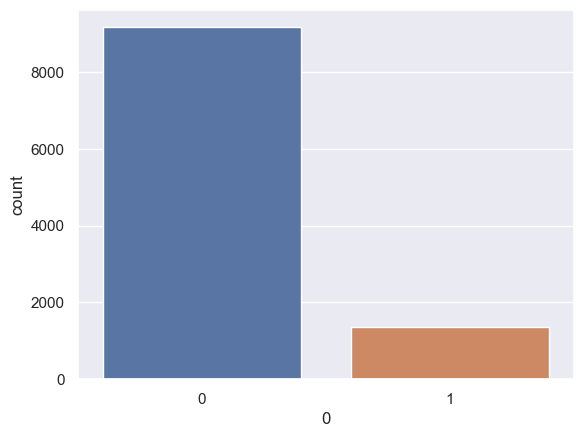

In [3]:
X_train = combined_2.drop('0', axis=1)
y_train = combined_2['0']

sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [4]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

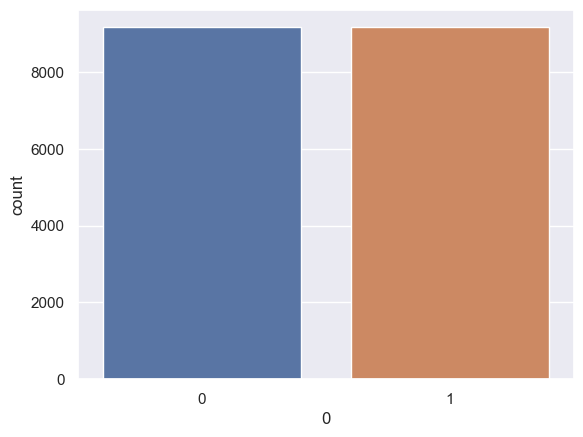

In [5]:
sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [7]:
time_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_2.csv")
freq_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2.dropna(inplace=True)
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,78.601562,1030,-828,60655.739685,246.283860,258.522621,156.617188,3.5,1858,...,12.439837,8560.738025,15983.535370,4.248273,2.370674,7979.675602,4755.142983,7.571073,0.379642,2399.398173
2,0,156.140625,1838,-2292,401451.667725,633.602137,652.557708,413.609375,9.0,4130,...,6.373211,6877.955426,18266.900303,4.884802,0.837604,8786.549459,5069.140897,5.838538,1.651229,2713.047835
3,0,85.671875,1616,-969,179734.798584,423.951411,432.521062,260.796875,9.0,2585,...,6.841925,11944.926833,40588.163377,4.587193,2.647984,20789.235206,14451.020219,6.734947,0.462077,7376.805080
4,0,221.210938,2121,-2020,385493.213318,620.880998,659.111138,387.492188,7.5,4141,...,9.759224,8079.526761,24040.578673,4.565041,3.028936,12640.882407,6065.831452,5.945447,1.705845,3031.083371
5,0,155.703125,1919,-1808,331288.989990,575.577093,596.265422,357.250000,9.5,3727,...,5.507809,11090.339744,26213.642146,7.035668,0.306370,13292.952872,9531.289506,7.223921,2.797861,4819.899494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1,206.671875,2959,-393,109801.861084,331.363639,390.531849,244.609375,3.0,3352,...,3.685523,4605.687116,11879.681329,5.380899,3.137411,6266.845412,5480.937963,8.388439,0.459242,2791.476408
1667,1,219.843750,3212,-353,86467.006836,294.052728,367.148854,245.046875,3.0,3565,...,6.387700,4223.543442,13826.200372,4.706745,3.260161,6686.544807,6030.638460,7.772561,0.243918,3158.263231
1668,1,288.445312,2848,-1181,315804.122009,561.964520,631.668283,399.164062,5.0,4029,...,3.152466,8398.438118,26427.903535,6.707569,0.318474,12959.945923,7732.347773,8.024593,-0.156369,3944.828710
1669,1,387.890625,4111,-1757,776518.003662,881.202589,962.796521,590.093750,8.0,5868,...,9.044716,6584.775160,13789.042777,5.084150,2.497281,6695.225971,8667.012826,7.872043,-0.653135,4277.529343


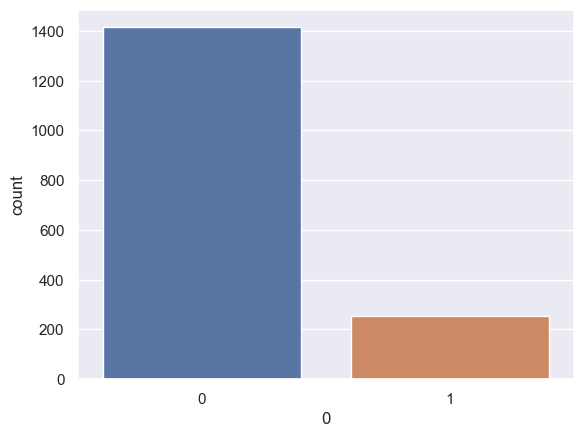

In [8]:
X_test = combined_2.drop('0', axis=1)
y_test = combined_2['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [9]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

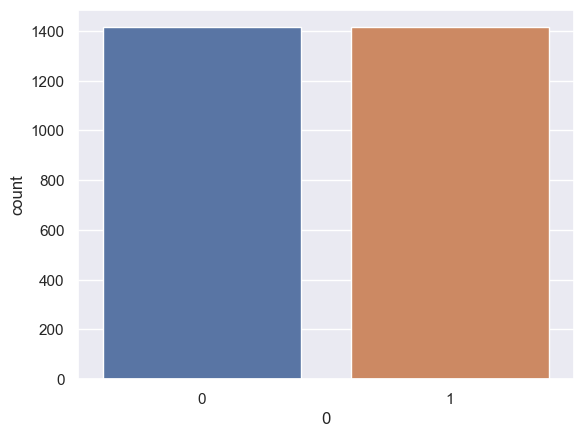

In [10]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [11]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [ ]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150, n_jobs = 16)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Accuracy on Test Set:", final_accuracy)

[I 2023-12-17 17:26:17,010] A new study created in memory with name: no-name-73a72e7a-12e0-4585-b713-fa637baa6b2b


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[I 2023-12-17 17:27:24,739] Trial 12 finished with value: 0.6909320307381339 and parameters: {'C': 0.0007074533989667231, 'kernel': 'poly', 'degree': 4, 'gamma': 0.11319616737184979, 'shrinking': False, 'tol': 0.0018361256697535426, 'decision_function_shape': 'ovo', 'alpha': 0.8724569815070471}. Best is trial 12 with value: 0.6909320307381339.


[LibSVM]

[I 2023-12-17 17:28:38,816] Trial 10 finished with value: 0.5955753510043218 and parameters: {'C': 7.747197171429849, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.005508089359322932, 'shrinking': False, 'tol': 0.0002216176352312451, 'decision_function_shape': 'ovo', 'alpha': 0.3214020841604367}. Best is trial 12 with value: 0.6909320307381339.


[LibSVM]

[I 2023-12-17 17:28:52,384] Trial 3 finished with value: 0.9170579278921624 and parameters: {'C': 1.2282598262232678, 'kernel': 'rbf', 'degree': 6, 'gamma': 0.0003073039686419625, 'shrinking': False, 'tol': 0.01950347816690862, 'decision_function_shape': 'ovo', 'alpha': 0.6273342148729323}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:29:17,624] Trial 15 finished with value: 0.9139793741593236 and parameters: {'C': 2.179825356934862, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.00016411502108752671, 'shrinking': False, 'tol': 0.027431528719652733, 'decision_function_shape': 'ovo', 'alpha': 0.3902586255546947}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:29:59,236] Trial 7 finished with value: 0.6645676578127234 and parameters: {'C': 16444.180770446397, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 18.584231499956203, 'shrinking': False, 'tol': 0.0007477607325343595, 'decision_function_shape': 'ovr', 'alpha': 0.8172827357357636}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:30:27,508] Trial 6 finished with value: 0.5058900175985096 and parameters: {'C': 0.11586786350048613, 'kernel': 'sigmoid', 'degree': 7, 'gamma': 152.54143777257477, 'shrinking': True, 'tol': 1.3713911843750367e-05, 'decision_function_shape': 'ovo', 'alpha': 0.24738651413641388}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:31:08,970] Trial 18 finished with value: 0.8116494463856851 and parameters: {'C': 0.38336495216964295, 'kernel': 'rbf', 'degree': 2, 'gamma': 0.004081131631050927, 'shrinking': True, 'tol': 5.167092177044473e-05, 'decision_function_shape': 'ovo', 'alpha': 0.19510675213911532}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:32:02,620] Trial 13 finished with value: 0.8327358006548351 and parameters: {'C': 0.7177231059941513, 'kernel': 'linear', 'degree': 6, 'gamma': 1.098021921457412, 'shrinking': True, 'tol': 0.0007847506151976779, 'decision_function_shape': 'ovr', 'alpha': 0.7709266451453914}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:32:17,856] Trial 16 finished with value: 0.8066588045997807 and parameters: {'C': 0.0016127142192938844, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 1605.4013732904357, 'shrinking': True, 'tol': 0.03344788964561105, 'decision_function_shape': 'ovr', 'alpha': 0.7419706406293565}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:33:12,769] Trial 14 finished with value: 0.5852824924985467 and parameters: {'C': 6.176681278885963e-05, 'kernel': 'sigmoid', 'degree': 7, 'gamma': 19339.80757286433, 'shrinking': False, 'tol': 0.000303023233066869, 'decision_function_shape': 'ovo', 'alpha': 0.42009954092944557}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:33:49,277] Trial 9 finished with value: 0.0 and parameters: {'C': 9.689207859829154e-05, 'kernel': 'rbf', 'degree': 2, 'gamma': 661.5971866713039, 'shrinking': True, 'tol': 0.0609281116776135, 'decision_function_shape': 'ovo', 'alpha': 0.8961005874961145}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:33:51,642] Trial 11 finished with value: 0.0 and parameters: {'C': 0.021155608457383155, 'kernel': 'rbf', 'degree': 3, 'gamma': 3.2572939736324966, 'shrinking': True, 'tol': 0.08321620380212094, 'decision_function_shape': 'ovo', 'alpha': 0.34656452522921644}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:34:14,875] Trial 20 finished with value: 0.670474757742759 and parameters: {'C': 11784.833336326878, 'kernel': 'sigmoid', 'degree': 7, 'gamma': 0.04039457074359993, 'shrinking': True, 'tol': 0.019230736542897107, 'decision_function_shape': 'ovr', 'alpha': 0.4636625681429438}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:34:19,106] Trial 22 finished with value: 0.9117701168481023 and parameters: {'C': 0.0003123052562214203, 'kernel': 'linear', 'degree': 5, 'gamma': 15114.433947076945, 'shrinking': True, 'tol': 0.00012255756520961582, 'decision_function_shape': 'ovr', 'alpha': 0.2165983627079867}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:34:59,926] Trial 25 finished with value: 0.8345436165982651 and parameters: {'C': 629.8336262920903, 'kernel': 'rbf', 'degree': 5, 'gamma': 1.8100644318604556e-05, 'shrinking': False, 'tol': 0.00595583934873491, 'decision_function_shape': 'ovr', 'alpha': 0.6029860329852345}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:35:06,744] Trial 21 finished with value: 0.9137222303409658 and parameters: {'C': 0.05871829269564647, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 0.0002403351148642556, 'shrinking': False, 'tol': 9.127280348365636e-05, 'decision_function_shape': 'ovo', 'alpha': 0.38212733280577293}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:35:13,249] Trial 23 finished with value: 0.6683540833307744 and parameters: {'C': 16.589398079653673, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 79843.4120822083, 'shrinking': False, 'tol': 1.0320949823638867e-05, 'decision_function_shape': 'ovo', 'alpha': 0.8335075912398301}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:35:20,590] Trial 26 finished with value: 0.8024110717801156 and parameters: {'C': 335.2827541788077, 'kernel': 'rbf', 'degree': 5, 'gamma': 1.3430753965483488e-05, 'shrinking': False, 'tol': 0.0070912463270515445, 'decision_function_shape': 'ovo', 'alpha': 0.013099223541848115}. Best is trial 3 with value: 0.9170579278921624.


[LibSVM]

[I 2023-12-17 17:35:51,550] Trial 29 finished with value: 0.9220835127677929 and parameters: {'C': 40.11938640937324, 'kernel': 'poly', 'degree': 1, 'gamma': 2.4072697487223115e-05, 'shrinking': False, 'tol': 0.009417819149691925, 'decision_function_shape': 'ovo', 'alpha': 0.6217422749300667}. Best is trial 29 with value: 0.9220835127677929.


[LibSVM]

[I 2023-12-17 17:37:01,228] Trial 33 finished with value: 0.8283171240886626 and parameters: {'C': 26.87612845981615, 'kernel': 'poly', 'degree': 1, 'gamma': 0.00041094418300505073, 'shrinking': False, 'tol': 0.009269484210547407, 'decision_function_shape': 'ovo', 'alpha': 0.5837959900574817}. Best is trial 29 with value: 0.9220835127677929.


[LibSVM]

[I 2023-12-17 17:37:18,534] Trial 31 finished with value: 0.9020641816367425 and parameters: {'C': 43.30956831173804, 'kernel': 'poly', 'degree': 1, 'gamma': 1.0048546232694099e-05, 'shrinking': False, 'tol': 0.010246257452968806, 'decision_function_shape': 'ovo', 'alpha': 0.0028671612012928227}. Best is trial 29 with value: 0.9220835127677929.


[LibSVM]

[I 2023-12-17 17:37:34,116] Trial 32 finished with value: 0.934331051487445 and parameters: {'C': 22.404101281525804, 'kernel': 'poly', 'degree': 1, 'gamma': 1.2374700357820783e-05, 'shrinking': False, 'tol': 0.008171659259867027, 'decision_function_shape': 'ovo', 'alpha': 0.6124213894563222}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:37:46,251] Trial 34 finished with value: 0.8042790545373228 and parameters: {'C': 86.530215100184, 'kernel': 'poly', 'degree': 1, 'gamma': 0.0005239323209931711, 'shrinking': False, 'tol': 0.005583599535177215, 'decision_function_shape': 'ovo', 'alpha': 0.5951661238452749}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:38:29,666] Trial 28 finished with value: 0.0 and parameters: {'C': 48.15853199464045, 'kernel': 'poly', 'degree': 5, 'gamma': 1.1869710983824182e-05, 'shrinking': False, 'tol': 0.006663373084577837, 'decision_function_shape': 'ovo', 'alpha': 0.6197009509071905}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:39:33,060] Trial 36 finished with value: 0.9324483873889261 and parameters: {'C': 1.8296093317841295, 'kernel': 'poly', 'degree': 1, 'gamma': 0.00028687215300928214, 'shrinking': False, 'tol': 0.002868614657069087, 'decision_function_shape': 'ovo', 'alpha': 0.6543573363005372}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:40:20,087] Trial 30 finished with value: 0.0 and parameters: {'C': 35.61148483902432, 'kernel': 'poly', 'degree': 5, 'gamma': 1.3511469358567039e-05, 'shrinking': False, 'tol': 0.008881116262001618, 'decision_function_shape': 'ovo', 'alpha': 0.06913861130834331}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:43:18,042] Trial 38 finished with value: 0.012733759847747514 and parameters: {'C': 1502.7356902774497, 'kernel': 'poly', 'degree': 6, 'gamma': 7.617825482116563e-05, 'shrinking': False, 'tol': 0.002153083931141467, 'decision_function_shape': 'ovo', 'alpha': 0.997871705298071}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:44:50,875] Trial 35 finished with value: 0.8182330044405973 and parameters: {'C': 242.97902653364798, 'kernel': 'poly', 'degree': 1, 'gamma': 0.002977247457099742, 'shrinking': False, 'tol': 0.0027808466874707917, 'decision_function_shape': 'ovo', 'alpha': 0.651194217971441}. Best is trial 32 with value: 0.934331051487445.


[LibSVM]

[I 2023-12-17 17:46:58,486] Trial 42 finished with value: 0.9360029828304477 and parameters: {'C': 0.00800433516463569, 'kernel': 'poly', 'degree': 1, 'gamma': 0.004097173453017781, 'shrinking': False, 'tol': 0.001867964245344554, 'decision_function_shape': 'ovo', 'alpha': 0.6904505215531886}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:47:39,512] Trial 43 finished with value: 0.9278519818885651 and parameters: {'C': 0.005982819163682396, 'kernel': 'poly', 'degree': 1, 'gamma': 0.03748383263069903, 'shrinking': False, 'tol': 0.0035220454597469186, 'decision_function_shape': 'ovo', 'alpha': 0.5172049572181681}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:48:41,155] Trial 44 finished with value: 0.7231925098943719 and parameters: {'C': 0.011706774111576005, 'kernel': 'poly', 'degree': 2, 'gamma': 0.031931589204733976, 'shrinking': False, 'tol': 0.001218307270498936, 'decision_function_shape': 'ovo', 'alpha': 0.5248933977515016}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:49:21,302] Trial 19 finished with value: 0.0 and parameters: {'C': 90637.02450084889, 'kernel': 'rbf', 'degree': 2, 'gamma': 33025.557120339996, 'shrinking': True, 'tol': 4.5300262313227295e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9168390034301227}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:51:39,346] Trial 45 finished with value: 0.9266441178451232 and parameters: {'C': 1.1133618516574783e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0016365443267052143, 'shrinking': False, 'tol': 0.001362353364114581, 'decision_function_shape': 'ovo', 'alpha': 0.7331168180214566}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:53:00,044] Trial 46 finished with value: 0.6824329174641324 and parameters: {'C': 0.00327231345243483, 'kernel': 'poly', 'degree': 1, 'gamma': 0.0010001218442815848, 'shrinking': False, 'tol': 0.0033330172194425763, 'decision_function_shape': 'ovo', 'alpha': 0.6988018606932199}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:53:06,953] Trial 47 finished with value: 0.8960262438216837 and parameters: {'C': 0.005308785905853199, 'kernel': 'poly', 'degree': 1, 'gamma': 0.001507963541959876, 'shrinking': False, 'tol': 0.003219183920964966, 'decision_function_shape': 'ovo', 'alpha': 0.7213619247922926}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:53:35,690] Trial 48 finished with value: 0.9176571538786598 and parameters: {'C': 0.005946837838978969, 'kernel': 'poly', 'degree': 1, 'gamma': 0.26246336710987334, 'shrinking': False, 'tol': 0.003336906706943202, 'decision_function_shape': 'ovo', 'alpha': 0.6849504162484735}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:54:04,328] Trial 50 finished with value: 0.6989202408536322 and parameters: {'C': 0.14473046650707558, 'kernel': 'poly', 'degree': 3, 'gamma': 0.019472179076636596, 'shrinking': False, 'tol': 0.0005938564579760961, 'decision_function_shape': 'ovo', 'alpha': 0.5183419920778798}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:54:30,805] Trial 51 finished with value: 0.7295623980612626 and parameters: {'C': 3.3738103174118055, 'kernel': 'poly', 'degree': 3, 'gamma': 0.017629698480496447, 'shrinking': False, 'tol': 0.0002841849916372003, 'decision_function_shape': 'ovo', 'alpha': 0.5167860697280815}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:54:58,357] Trial 52 finished with value: 0.6219559584697862 and parameters: {'C': 2.117771106235349, 'kernel': 'poly', 'degree': 2, 'gamma': 0.013351918234031972, 'shrinking': False, 'tol': 0.0005023722672564303, 'decision_function_shape': 'ovr', 'alpha': 0.5383367224667602}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:55:06,045] Trial 49 finished with value: 0.7920818010260402 and parameters: {'C': 3.420655258592225, 'kernel': 'poly', 'degree': 1, 'gamma': 0.013195982499710445, 'shrinking': False, 'tol': 0.0004456405300850207, 'decision_function_shape': 'ovo', 'alpha': 0.505369136926226}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:55:14,771] Trial 53 finished with value: 0.6517189147839209 and parameters: {'C': 0.04946102983124115, 'kernel': 'poly', 'degree': 2, 'gamma': 22.44569336048393, 'shrinking': False, 'tol': 0.018659526613069344, 'decision_function_shape': 'ovr', 'alpha': 0.807058984313309}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:56:48,585] Trial 54 finished with value: 0.8312991150964473 and parameters: {'C': 0.04983118034387115, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00010941839392374116, 'shrinking': False, 'tol': 0.016143408940811434, 'decision_function_shape': 'ovo', 'alpha': 0.8040673929687148}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:57:02,346] Trial 55 finished with value: 0.8282210145800242 and parameters: {'C': 0.06622547396768978, 'kernel': 'linear', 'degree': 2, 'gamma': 39.94346872072616, 'shrinking': False, 'tol': 0.016137817267709884, 'decision_function_shape': 'ovo', 'alpha': 0.7974987545030727}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:57:16,133] Trial 37 finished with value: 0.8127125357415881 and parameters: {'C': 1501.812655462361, 'kernel': 'poly', 'degree': 1, 'gamma': 0.001516395439973878, 'shrinking': False, 'tol': 0.002393846399141208, 'decision_function_shape': 'ovo', 'alpha': 0.6143056411449082}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:58:49,555] Trial 24 finished with value: 0.7912068294439096 and parameters: {'C': 12.352973730801402, 'kernel': 'linear', 'degree': 3, 'gamma': 15.39594741454251, 'shrinking': True, 'tol': 0.0927881081661672, 'decision_function_shape': 'ovo', 'alpha': 0.23188925302978847}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:59:07,688] Trial 56 finished with value: 0.925953964241613 and parameters: {'C': 1.1936857448592188e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.1719990379301629, 'shrinking': False, 'tol': 0.0013715744369520771, 'decision_function_shape': 'ovo', 'alpha': 0.6673976076309828}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 17:59:17,966] Trial 57 finished with value: 0.935143856953478 and parameters: {'C': 0.0002321964380459302, 'kernel': 'linear', 'degree': 2, 'gamma': 6.510332551761308e-05, 'shrinking': False, 'tol': 0.001330313786076412, 'decision_function_shape': 'ovo', 'alpha': 0.6710708169193741}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 18:00:16,831] Trial 40 finished with value: 0.829328194835214 and parameters: {'C': 701.483829292016, 'kernel': 'poly', 'degree': 1, 'gamma': 0.00422151813264684, 'shrinking': False, 'tol': 0.0032302357896034617, 'decision_function_shape': 'ovo', 'alpha': 0.7278319020721196}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 18:01:02,278] Trial 58 finished with value: 0.9298995928153423 and parameters: {'C': 1.5980782249583074e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.20569916025479137, 'shrinking': False, 'tol': 0.0011971095349495918, 'decision_function_shape': 'ovo', 'alpha': 0.6608533112238004}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 18:01:29,358] Trial 59 finished with value: 0.9261743972118204 and parameters: {'C': 1.2002739856321928e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.08985327663778137, 'shrinking': False, 'tol': 0.0013973635038898972, 'decision_function_shape': 'ovo', 'alpha': 0.671701460873208}. Best is trial 42 with value: 0.9360029828304477.


[LibSVM]

[I 2023-12-17 18:01:37,201] Trial 60 finished with value: 0.9391913792839047 and parameters: {'C': 0.00018223548031304478, 'kernel': 'linear', 'degree': 2, 'gamma': 0.10891452414900195, 'shrinking': False, 'tol': 0.0015176416292688177, 'decision_function_shape': 'ovo', 'alpha': 0.6777116113121376}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:02:00,797] Trial 62 finished with value: 0.9248038336121123 and parameters: {'C': 0.0002232891338713523, 'kernel': 'linear', 'degree': 1, 'gamma': 8.705066236016573e-05, 'shrinking': False, 'tol': 0.0008850878834155294, 'decision_function_shape': 'ovo', 'alpha': 0.45288597878285053}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:02:50,769] Trial 63 finished with value: 0.9269275253169365 and parameters: {'C': 0.0002874370244149152, 'kernel': 'linear', 'degree': 1, 'gamma': 4.9096356712199443e-05, 'shrinking': False, 'tol': 0.0007627336385588782, 'decision_function_shape': 'ovo', 'alpha': 0.46244384318841186}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:02:51,451] Trial 41 finished with value: 0.8546363544497356 and parameters: {'C': 734.4687878664475, 'kernel': 'poly', 'degree': 1, 'gamma': 0.0034759234589217315, 'shrinking': False, 'tol': 0.0020403753085051473, 'decision_function_shape': 'ovo', 'alpha': 0.9613239888836314}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:04:09,461] Trial 64 finished with value: 0.9356036059749366 and parameters: {'C': 0.00014254200015511413, 'kernel': 'linear', 'degree': 2, 'gamma': 3.80203247203408e-05, 'shrinking': True, 'tol': 0.0008250095110057626, 'decision_function_shape': 'ovr', 'alpha': 0.5743924108825184}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:04:33,409] Trial 66 finished with value: 0.9382585860251851 and parameters: {'C': 9.15204026849502e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 7.929281350573572e-05, 'shrinking': False, 'tol': 0.0008652845481508243, 'decision_function_shape': 'ovo', 'alpha': 0.5648728820684046}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:04:41,501] Trial 65 finished with value: 0.9310472853370653 and parameters: {'C': 0.00011658390792667185, 'kernel': 'linear', 'degree': 1, 'gamma': 5.449226532412156e-05, 'shrinking': True, 'tol': 0.0008091057082582882, 'decision_function_shape': 'ovr', 'alpha': 0.4574970679719301}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:04:56,249] Trial 61 finished with value: 0.8320800121189392 and parameters: {'C': 0.34417906736379444, 'kernel': 'linear', 'degree': 2, 'gamma': 5.0493508283863145e-05, 'shrinking': False, 'tol': 0.0008672615309159777, 'decision_function_shape': 'ovo', 'alpha': 0.7536211249761787}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:05:28,830] Trial 67 finished with value: 0.9369443723274677 and parameters: {'C': 5.8665192140180626e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.7379917826408323, 'shrinking': True, 'tol': 0.0007372415194159776, 'decision_function_shape': 'ovo', 'alpha': 0.5693815627766244}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:06:07,577] Trial 68 finished with value: 0.9377944550577488 and parameters: {'C': 7.296905090731134e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 2.576819757468183, 'shrinking': True, 'tol': 0.00452191276797407, 'decision_function_shape': 'ovr', 'alpha': 0.5660005196041722}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:06:19,339] Trial 70 finished with value: 0.918919248977324 and parameters: {'C': 0.0010236482133629686, 'kernel': 'linear', 'degree': 3, 'gamma': 4.062320550177048e-05, 'shrinking': True, 'tol': 0.00018478951091669308, 'decision_function_shape': 'ovr', 'alpha': 0.5734938860201628}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:06:25,849] Trial 69 finished with value: 0.9375071139879694 and parameters: {'C': 4.241068725324232e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.41557936753230584, 'shrinking': True, 'tol': 0.05446346728675263, 'decision_function_shape': 'ovr', 'alpha': 0.5583290250375067}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:06:59,132] Trial 72 finished with value: 0.9143537220078406 and parameters: {'C': 0.0012167211799105555, 'kernel': 'linear', 'degree': 3, 'gamma': 0.5418989089230055, 'shrinking': True, 'tol': 0.04053132317160695, 'decision_function_shape': 'ovr', 'alpha': 0.5644106237297501}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:07:12,461] Trial 73 finished with value: 0.9150719313244693 and parameters: {'C': 0.0013510928064784777, 'kernel': 'linear', 'degree': 3, 'gamma': 0.812205620198744, 'shrinking': True, 'tol': 0.00019521960135963608, 'decision_function_shape': 'ovr', 'alpha': 0.5853344957937265}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:07:54,192] Trial 71 finished with value: 0.9374615638420872 and parameters: {'C': 5.1065379483064384e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.7286124918460363, 'shrinking': True, 'tol': 0.00015601011765859214, 'decision_function_shape': 'ovr', 'alpha': 0.557640726934258}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:08:33,565] Trial 75 finished with value: 0.9193933741066174 and parameters: {'C': 0.0008784809059597078, 'kernel': 'linear', 'degree': 4, 'gamma': 2.379165587832655, 'shrinking': True, 'tol': 0.00020232730023842573, 'decision_function_shape': 'ovr', 'alpha': 0.5637302131318244}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:09:15,157] Trial 74 finished with value: 0.9389352541023751 and parameters: {'C': 4.4981790986276046e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 2.614223960620439, 'shrinking': True, 'tol': 0.0001656140299026173, 'decision_function_shape': 'ovr', 'alpha': 0.55568247452899}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:10:11,033] Trial 76 finished with value: 0.9376063765889231 and parameters: {'C': 4.280143374330014e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 2.272493734208654, 'shrinking': True, 'tol': 0.0003930067091538891, 'decision_function_shape': 'ovr', 'alpha': 0.5609314883305722}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:10:17,820] Trial 77 finished with value: 0.9339290008573473 and parameters: {'C': 4.040134659972982e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 1.8089591591333423, 'shrinking': True, 'tol': 0.061087300670733743, 'decision_function_shape': 'ovr', 'alpha': 0.556514872260707}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:10:58,826] Trial 79 finished with value: 0.9291787109492059 and parameters: {'C': 4.84235554163586e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 4.182715022887505, 'shrinking': True, 'tol': 0.00032546019878142444, 'decision_function_shape': 'ovr', 'alpha': 0.3139709184039645}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:11:02,365] Trial 78 finished with value: 0.9299318677545738 and parameters: {'C': 3.27455052868346e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 2.152209631257473, 'shrinking': True, 'tol': 0.0004371561721769769, 'decision_function_shape': 'ovr', 'alpha': 0.5594987175364295}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:11:30,336] Trial 1 finished with value: 0.7920482927874829 and parameters: {'C': 2.095997052708776, 'kernel': 'linear', 'degree': 1, 'gamma': 13028.284631648768, 'shrinking': False, 'tol': 0.00011261212529771602, 'decision_function_shape': 'ovo', 'alpha': 0.45665128455354}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:11:31,677] Trial 80 finished with value: 0.9267973055834338 and parameters: {'C': 5.920977886985421e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 2.957034165832882, 'shrinking': True, 'tol': 2.1905410047249476e-05, 'decision_function_shape': 'ovr', 'alpha': 0.34293421901188603}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:12:54,399] Trial 82 finished with value: 0.9303855680169122 and parameters: {'C': 5.8680164001898725e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 4.241577643470423, 'shrinking': True, 'tol': 4.0810363369977815e-05, 'decision_function_shape': 'ovr', 'alpha': 0.41378086254382035}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:14:03,878] Trial 83 finished with value: 0.9319665337370777 and parameters: {'C': 4.3843731820840635e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 6.610924669602611, 'shrinking': True, 'tol': 7.894785124245916e-05, 'decision_function_shape': 'ovr', 'alpha': 0.4248458904662134}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:14:12,154] Trial 87 finished with value: 0.9209424543548924 and parameters: {'C': 0.000532778181913467, 'kernel': 'linear', 'degree': 3, 'gamma': 4.834746568366765, 'shrinking': True, 'tol': 0.0001077349076355859, 'decision_function_shape': 'ovr', 'alpha': 0.42942987364924207}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:14:32,477] Trial 86 finished with value: 0.9312302590209772 and parameters: {'C': 7.718305169546817e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 4.959123595809776, 'shrinking': True, 'tol': 0.00011319400644564694, 'decision_function_shape': 'ovr', 'alpha': 0.39548069955589693}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:15:09,021] Trial 81 finished with value: 0.0 and parameters: {'C': 3.9667538435992635e-05, 'kernel': 'rbf', 'degree': 4, 'gamma': 4.4473869708274645, 'shrinking': True, 'tol': 5.476807499570233e-05, 'decision_function_shape': 'ovr', 'alpha': 0.3489416764006148}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:15:36,153] Trial 89 finished with value: 0.925372717129556 and parameters: {'C': 0.0004633161450800642, 'kernel': 'linear', 'degree': 3, 'gamma': 124.28837268149427, 'shrinking': True, 'tol': 7.229619375420062e-05, 'decision_function_shape': 'ovr', 'alpha': 0.48746403656487064}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:16:56,968] Trial 84 finished with value: 0.0 and parameters: {'C': 3.5258785164863736e-05, 'kernel': 'rbf', 'degree': 4, 'gamma': 6.344644549291961, 'shrinking': True, 'tol': 6.021889085802963e-05, 'decision_function_shape': 'ovr', 'alpha': 0.31468595915899966}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:17:35,746] Trial 85 finished with value: 0.0 and parameters: {'C': 0.00039576970116374244, 'kernel': 'rbf', 'degree': 4, 'gamma': 5.209313677878806, 'shrinking': True, 'tol': 4.894531297154451e-05, 'decision_function_shape': 'ovr', 'alpha': 0.41503531668752547}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:18:09,805] Trial 88 finished with value: 0.0 and parameters: {'C': 2.4190441758598717e-05, 'kernel': 'rbf', 'degree': 3, 'gamma': 5.668406919570745, 'shrinking': True, 'tol': 0.00012002914866363446, 'decision_function_shape': 'ovr', 'alpha': 0.4261700321386427}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:20:29,903] Trial 90 finished with value: 0.0 and parameters: {'C': 0.00046301220029038525, 'kernel': 'rbf', 'degree': 3, 'gamma': 73.14132793607094, 'shrinking': True, 'tol': 0.0001415747476306814, 'decision_function_shape': 'ovr', 'alpha': 0.6346245071932949}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:20:34,477] Trial 91 finished with value: 0.0 and parameters: {'C': 2.417015869487305e-05, 'kernel': 'rbf', 'degree': 3, 'gamma': 453.88066359958583, 'shrinking': True, 'tol': 0.00014599674714210848, 'decision_function_shape': 'ovr', 'alpha': 0.6356362851934612}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:20:58,948] Trial 92 finished with value: 0.0 and parameters: {'C': 2.1267751615746016e-05, 'kernel': 'rbf', 'degree': 3, 'gamma': 105.52843919441183, 'shrinking': True, 'tol': 0.00032726417255088554, 'decision_function_shape': 'ovr', 'alpha': 0.48546266049569886}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:21:49,407] Trial 93 finished with value: 0.6024420605907108 and parameters: {'C': 2.726029586782163e-05, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 284.0676983214317, 'shrinking': True, 'tol': 0.0003144756717140559, 'decision_function_shape': 'ovr', 'alpha': 0.4948211800941868}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:22:24,722] Trial 94 finished with value: 0.6346979513398358 and parameters: {'C': 2.2402180001809522e-05, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.3823680013879001, 'shrinking': True, 'tol': 0.00015717324030669716, 'decision_function_shape': 'ovr', 'alpha': 0.6359909781878591}. Best is trial 60 with value: 0.9391913792839047.


[LibSVM]

[I 2023-12-17 18:23:39,212] Trial 98 finished with value: 0.9412802824149173 and parameters: {'C': 0.00014502414459199417, 'kernel': 'linear', 'degree': 3, 'gamma': 0.46367147996169, 'shrinking': True, 'tol': 0.004320976035142111, 'decision_function_shape': 'ovr', 'alpha': 0.7038413725756285}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:23:40,211] Trial 95 finished with value: 0.5992655306553629 and parameters: {'C': 1.9381120897708832e-05, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.42919364678267563, 'shrinking': True, 'tol': 0.00013934196790191621, 'decision_function_shape': 'ovr', 'alpha': 0.48107268247277546}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:24:13,340] Trial 100 finished with value: 0.9403491000008517 and parameters: {'C': 0.00013696234058948055, 'kernel': 'linear', 'degree': 3, 'gamma': 0.42682364269001144, 'shrinking': True, 'tol': 0.004391475731400744, 'decision_function_shape': 'ovr', 'alpha': 0.6932040885252624}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:24:13,953] Trial 96 finished with value: 0.6351290169639163 and parameters: {'C': 2.0568869357452045e-05, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.7077499239656716, 'shrinking': True, 'tol': 0.0002808981890965927, 'decision_function_shape': 'ovr', 'alpha': 0.6351750180165576}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:24:49,269] Trial 97 finished with value: 0.6341872341482988 and parameters: {'C': 0.00010869403791318194, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.521236390088824, 'shrinking': True, 'tol': 0.0017738648427118395, 'decision_function_shape': 'ovr', 'alpha': 0.6334061468661614}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:25:04,176] Trial 101 finished with value: 0.9368997478978478 and parameters: {'C': 0.00014273534506187828, 'kernel': 'linear', 'degree': 5, 'gamma': 0.4239319368629807, 'shrinking': True, 'tol': 0.0005710468124452095, 'decision_function_shape': 'ovr', 'alpha': 0.6039491819794345}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:25:07,681] Trial 99 finished with value: 0.7606098520456178 and parameters: {'C': 0.0021041625006791016, 'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.4268535168029177, 'shrinking': True, 'tol': 0.004577148617279044, 'decision_function_shape': 'ovr', 'alpha': 0.48330370924533556}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:25:33,628] Trial 102 finished with value: 0.9408134184971086 and parameters: {'C': 0.00017228847598604457, 'kernel': 'linear', 'degree': 5, 'gamma': 13.327932028656145, 'shrinking': True, 'tol': 0.004716854481314869, 'decision_function_shape': 'ovr', 'alpha': 0.703861130185056}. Best is trial 98 with value: 0.9412802824149173.


[LibSVM]

[I 2023-12-17 18:26:58,699] Trial 104 finished with value: 0.9414945330489886 and parameters: {'C': 0.0001437699015608751, 'kernel': 'linear', 'degree': 5, 'gamma': 1.1091421761037203, 'shrinking': True, 'tol': 0.0006211002975985723, 'decision_function_shape': 'ovr', 'alpha': 0.7087270697640887}. Best is trial 104 with value: 0.9414945330489886.


[LibSVM]

[I 2023-12-17 18:27:01,440] Trial 103 finished with value: 0.9333961369707173 and parameters: {'C': 0.0001232530777220739, 'kernel': 'linear', 'degree': 3, 'gamma': 0.06801213441356682, 'shrinking': True, 'tol': 0.004330440147282777, 'decision_function_shape': 'ovr', 'alpha': 0.5355539144552443}. Best is trial 104 with value: 0.9414945330489886.


[LibSVM]

[I 2023-12-17 18:27:30,393] Trial 106 finished with value: 0.9416506395893369 and parameters: {'C': 0.00014508694907522618, 'kernel': 'linear', 'degree': 3, 'gamma': 0.07895094655530346, 'shrinking': True, 'tol': 0.004601267894867593, 'decision_function_shape': 'ovr', 'alpha': 0.7122868691951934}. Best is trial 106 with value: 0.9416506395893369.


[LibSVM]

[I 2023-12-17 18:27:37,145] Trial 105 finished with value: 0.9417547392047811 and parameters: {'C': 0.00011852807998273218, 'kernel': 'linear', 'degree': 5, 'gamma': 0.08354212420669382, 'shrinking': True, 'tol': 0.003979627247682483, 'decision_function_shape': 'ovr', 'alpha': 0.7044282457041542}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:28:03,142] Trial 107 finished with value: 0.9340291941133974 and parameters: {'C': 0.0001586079337716769, 'kernel': 'linear', 'degree': 5, 'gamma': 0.09575099564978792, 'shrinking': True, 'tol': 0.004621895704355721, 'decision_function_shape': 'ovr', 'alpha': 0.5386827318065838}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:28:12,571] Trial 108 finished with value: 0.9334544113232092 and parameters: {'C': 0.0001725745996303933, 'kernel': 'linear', 'degree': 3, 'gamma': 1.2481889510513933, 'shrinking': True, 'tol': 0.02569171592344141, 'decision_function_shape': 'ovr', 'alpha': 0.5368762309914912}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:28:18,570] Trial 109 finished with value: 0.9406342462213715 and parameters: {'C': 0.00016568105649219614, 'kernel': 'linear', 'degree': 3, 'gamma': 0.0683550298001987, 'shrinking': True, 'tol': 0.02665478433113438, 'decision_function_shape': 'ovr', 'alpha': 0.7097677460659623}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:28:51,816] Trial 110 finished with value: 0.9333587108157104 and parameters: {'C': 0.00013010222264357707, 'kernel': 'linear', 'degree': 5, 'gamma': 0.08993842858818168, 'shrinking': True, 'tol': 0.011274171581364257, 'decision_function_shape': 'ovr', 'alpha': 0.5349132065366752}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:30:03,842] Trial 111 finished with value: 0.9393661292571297 and parameters: {'C': 0.00020035589460902078, 'kernel': 'linear', 'degree': 5, 'gamma': 1.520280254134016, 'shrinking': True, 'tol': 0.004344585200876965, 'decision_function_shape': 'ovr', 'alpha': 0.7121935536280033}. Best is trial 105 with value: 0.9417547392047811.


[LibSVM]

[I 2023-12-17 18:30:06,049] Trial 112 finished with value: 0.9444695768660425 and parameters: {'C': 0.00020286561850143322, 'kernel': 'linear', 'degree': 6, 'gamma': 18.027507911175817, 'shrinking': True, 'tol': 0.012194099864684374, 'decision_function_shape': 'ovr', 'alpha': 0.8334170851971029}. Best is trial 112 with value: 0.9444695768660425.


[LibSVM]

[I 2023-12-17 18:30:41,451] Trial 113 finished with value: 0.9438473568128001 and parameters: {'C': 0.00017145852518474862, 'kernel': 'linear', 'degree': 5, 'gamma': 15.094463149553379, 'shrinking': True, 'tol': 0.012917112518336602, 'decision_function_shape': 'ovr', 'alpha': 0.7727049119389431}. Best is trial 112 with value: 0.9444695768660425.


[LibSVM]

[I 2023-12-17 18:30:44,015] Trial 114 finished with value: 0.9457613579035711 and parameters: {'C': 0.00019776954654092055, 'kernel': 'linear', 'degree': 6, 'gamma': 16.129526372869346, 'shrinking': True, 'tol': 0.011559855587191343, 'decision_function_shape': 'ovr', 'alpha': 0.8437488867271769}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:31:05,160] Trial 115 finished with value: 0.9367549270148943 and parameters: {'C': 0.0002278771713509227, 'kernel': 'linear', 'degree': 6, 'gamma': 9.8635231525245, 'shrinking': True, 'tol': 0.006590855950023393, 'decision_function_shape': 'ovr', 'alpha': 0.7050660071594639}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:31:06,186] Trial 118 finished with value: 0.910013969682359 and parameters: {'C': 0.002439256232654947, 'kernel': 'linear', 'degree': 6, 'gamma': 16.124774628314473, 'shrinking': True, 'tol': 0.01254684632784866, 'decision_function_shape': 'ovr', 'alpha': 0.7738312284468686}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:31:16,438] Trial 117 finished with value: 0.9378411209743556 and parameters: {'C': 0.000263487543349612, 'kernel': 'linear', 'degree': 6, 'gamma': 16.18181868626702, 'shrinking': True, 'tol': 0.006274164827776389, 'decision_function_shape': 'ovr', 'alpha': 0.7087157271420454}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:31:44,155] Trial 116 finished with value: 0.9439863833556125 and parameters: {'C': 8.656381238702675e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 12.847014653361867, 'shrinking': True, 'tol': 0.00643099305725945, 'decision_function_shape': 'ovr', 'alpha': 0.7142963122598093}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:31:50,287] Trial 39 finished with value: 0.8667893761244597 and parameters: {'C': 1401.8534218881628, 'kernel': 'poly', 'degree': 1, 'gamma': 0.005317772287752098, 'shrinking': False, 'tol': 0.002707608662981087, 'decision_function_shape': 'ovo', 'alpha': 0.979630484585321}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:32:19,260] Trial 119 finished with value: 0.9097064868669978 and parameters: {'C': 0.0024734802926654957, 'kernel': 'linear', 'degree': 6, 'gamma': 11.920150804738144, 'shrinking': True, 'tol': 0.0068921315658113285, 'decision_function_shape': 'ovr', 'alpha': 0.7695180178779949}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:32:22,803] Trial 120 finished with value: 0.9188737637309763 and parameters: {'C': 0.0021865694278093897, 'kernel': 'linear', 'degree': 6, 'gamma': 3080.3717525582206, 'shrinking': True, 'tol': 0.006449033993171184, 'decision_function_shape': 'ovr', 'alpha': 0.8576015364433238}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:32:59,481] Trial 122 finished with value: 0.9131769894567736 and parameters: {'C': 0.0028769631029301338, 'kernel': 'linear', 'degree': 6, 'gamma': 4288.267009839032, 'shrinking': True, 'tol': 0.0120576478283492, 'decision_function_shape': 'ovr', 'alpha': 0.8587447689123063}. Best is trial 114 with value: 0.9457613579035711.


[LibSVM]

[I 2023-12-17 18:33:43,626] Trial 121 finished with value: 0.9458240148071064 and parameters: {'C': 0.0002744294543732644, 'kernel': 'linear', 'degree': 6, 'gamma': 12.83255596145063, 'shrinking': True, 'tol': 0.011634784581069795, 'decision_function_shape': 'ovr', 'alpha': 0.8543279313442224}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:33:47,293] Trial 123 finished with value: 0.9402718590681258 and parameters: {'C': 0.0006958554426976939, 'kernel': 'linear', 'degree': 6, 'gamma': 11.216363964159225, 'shrinking': True, 'tol': 0.012494567551018729, 'decision_function_shape': 'ovr', 'alpha': 0.8571194333446932}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:34:00,423] Trial 125 finished with value: 0.9408789703953683 and parameters: {'C': 0.0006445932739007597, 'kernel': 'linear', 'degree': 6, 'gamma': 3746.1175265418738, 'shrinking': True, 'tol': 0.007893412602434481, 'decision_function_shape': 'ovr', 'alpha': 0.8360944792368041}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:34:06,892] Trial 124 finished with value: 0.9451251836008208 and parameters: {'C': 0.00029854042765302044, 'kernel': 'linear', 'degree': 6, 'gamma': 32.558414602090274, 'shrinking': True, 'tol': 0.007700072226221104, 'decision_function_shape': 'ovr', 'alpha': 0.8739784552982119}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:34:24,144] Trial 126 finished with value: 0.9368897296983894 and parameters: {'C': 0.000825830791693243, 'kernel': 'linear', 'degree': 6, 'gamma': 27.027193876717885, 'shrinking': True, 'tol': 0.007928926712621414, 'decision_function_shape': 'ovr', 'alpha': 0.8605145297032333}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:34:39,044] Trial 127 finished with value: 0.9411640963413581 and parameters: {'C': 0.0005444043977462433, 'kernel': 'linear', 'degree': 6, 'gamma': 37.17606027924304, 'shrinking': True, 'tol': 0.007359229587256103, 'decision_function_shape': 'ovr', 'alpha': 0.8419104718672776}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:35:06,324] Trial 128 finished with value: 0.9406468004921493 and parameters: {'C': 0.0005524817376411356, 'kernel': 'linear', 'degree': 7, 'gamma': 31.626613096197666, 'shrinking': True, 'tol': 0.01301178396563585, 'decision_function_shape': 'ovr', 'alpha': 0.8399252187035353}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:35:19,906] Trial 129 finished with value: 0.9418003764264449 and parameters: {'C': 0.00031004534156109777, 'kernel': 'linear', 'degree': 5, 'gamma': 1.1997408006812091, 'shrinking': True, 'tol': 0.014166505423602963, 'decision_function_shape': 'ovr', 'alpha': 0.8381283036054856}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:35:47,764] Trial 130 finished with value: 0.9442467436724433 and parameters: {'C': 0.0003363913602447894, 'kernel': 'linear', 'degree': 5, 'gamma': 33.4568566080496, 'shrinking': True, 'tol': 0.008331611864130744, 'decision_function_shape': 'ovr', 'alpha': 0.9193216582076362}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:36:13,631] Trial 131 finished with value: 0.9446100603765457 and parameters: {'C': 0.0006043250920089947, 'kernel': 'linear', 'degree': 5, 'gamma': 0.050123047708961546, 'shrinking': True, 'tol': 0.008584297695134288, 'decision_function_shape': 'ovr', 'alpha': 0.9122011687168894}. Best is trial 121 with value: 0.9458240148071064.
[I 2023-12-17 18:36:14,035] Trial 132 finished with value: 0.9364639591114661 and parameters: {'C': 0.0007446435015701547, 'kernel': 'linear', 'degree': 7, 'gamma': 27.95286516889056, 'shrinking': True, 'tol': 0.008608078702255413, 'decision_function_shape': 'ovr', 'alpha': 0.8219775065559112}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM][LibSVM]

[I 2023-12-17 18:36:31,259] Trial 134 finished with value: 0.9427739401147012 and parameters: {'C': 0.000678200085721001, 'kernel': 'linear', 'degree': 7, 'gamma': 63579.946999684056, 'shrinking': True, 'tol': 0.008067084783741173, 'decision_function_shape': 'ovr', 'alpha': 0.8993434111187487}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:36:38,766] Trial 133 finished with value: 0.9413746933004693 and parameters: {'C': 0.00033850025919807163, 'kernel': 'linear', 'degree': 7, 'gamma': 35.48088488884581, 'shrinking': True, 'tol': 0.024502632759697184, 'decision_function_shape': 'ovr', 'alpha': 0.837628663026509}. Best is trial 121 with value: 0.9458240148071064.


[LibSVM]

[I 2023-12-17 18:37:02,046] Trial 135 finished with value: 0.9468928602802879 and parameters: {'C': 0.00029038899023886924, 'kernel': 'linear', 'degree': 7, 'gamma': 40.439033697171915, 'shrinking': True, 'tol': 0.009390063547174745, 'decision_function_shape': 'ovr', 'alpha': 0.8955422552243676}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:37:15,525] Trial 136 finished with value: 0.9465736192256241 and parameters: {'C': 0.00029781689992638396, 'kernel': 'linear', 'degree': 7, 'gamma': 43.33506277444264, 'shrinking': True, 'tol': 0.015238704588230881, 'decision_function_shape': 'ovr', 'alpha': 0.9048612303803996}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:37:57,751] Trial 137 finished with value: 0.9453097840468494 and parameters: {'C': 0.0003087065949885244, 'kernel': 'linear', 'degree': 6, 'gamma': 53.686968331905014, 'shrinking': True, 'tol': 0.009109468752762511, 'decision_function_shape': 'ovr', 'alpha': 0.9024720644333852}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:38:12,079] Trial 138 finished with value: 0.944624099115813 and parameters: {'C': 0.0003202159056790651, 'kernel': 'linear', 'degree': 6, 'gamma': 0.21362989791055367, 'shrinking': True, 'tol': 0.015357891409799455, 'decision_function_shape': 'ovr', 'alpha': 0.9043288379062878}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:38:42,768] Trial 139 finished with value: 0.9454354032579363 and parameters: {'C': 0.00031284314162765967, 'kernel': 'linear', 'degree': 5, 'gamma': 49.08012679724153, 'shrinking': True, 'tol': 0.0219173211266886, 'decision_function_shape': 'ovr', 'alpha': 0.9133616863154699}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:39:09,546] Trial 140 finished with value: 0.9449527687809828 and parameters: {'C': 0.0003666285061805264, 'kernel': 'linear', 'degree': 5, 'gamma': 72.83165255876308, 'shrinking': True, 'tol': 0.01618189772168884, 'decision_function_shape': 'ovr', 'alpha': 0.9483657126912526}. Best is trial 135 with value: 0.9468928602802879.


[LibSVM]

[I 2023-12-17 18:39:11,232] Trial 141 finished with value: 0.9449822499238173 and parameters: {'C': 0.00032668069522994917, 'kernel': 'linear', 'degree': 5, 'gamma': 47.33733669902679, 'shrinking': True, 'tol': 0.01982596821054157, 'decision_function_shape': 'ovr', 'alpha': 0.9039828674531897}. Best is trial 135 with value: 0.9468928602802879.
[I 2023-12-17 18:39:24,275] Trial 142 finished with value: 0.9428259693059976 and parameters: {'C': 0.00037215476838763735, 'kernel': 'linear', 'degree': 5, 'gamma': 58.24926070023548, 'shrinking': True, 'tol': 0.014973549480004088, 'decision_function_shape': 'ovr', 'alpha': 0.9063503389855433}. Best is trial 135 with value: 0.9468928602802879.
[I 2023-12-17 18:39:34,053] Trial 143 finished with value: 0.9439092373933854 and parameters: {'C': 0.000335063494669411, 'kernel': 'linear', 'degree': 5, 'gamma': 62.817776242373625, 'shrinking': True, 'tol': 0.020743969530639443, 'decision_function_shape': 'ovr', 'alpha': 0.9045633384383653}. Best is tri

In [12]:
model = SVC(C=0.00029038899023886924, kernel='linear', degree=7, gamma=40.439033697171915,
                shrinking=True, tol=0.009390063547174745, decision_function_shape='ovr', random_state=42, verbose=2)
model.fit(X_train, y_train)

[LibSVM]

SVC(C=0.00029038899023886924, degree=7, gamma=40.439033697171915,
    kernel='linear', random_state=42, tol=0.009390063547174745, verbose=2)

In [13]:
y_pred = model.predict(X_test)

In [14]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.9759717314487633

In [15]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.9286219081272085

In [2]:
time_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_3.csv")
freq_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3.dropna(inplace=True)
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-57.843750,40,-161,984.183919,31.371706,65.803369,59.302083,5.0,201,...,6.292304,493.019052,889.524049,6.235764,3.018069,295.471347,1929.673035,8.734565,-0.187610,648.882331
2,0,-72.317708,30,-141,811.893853,28.493751,77.728661,72.734375,1.5,171,...,4.091930,391.152492,2020.990229,5.389589,5.426900,672.950878,1296.132606,9.425107,-0.926815,429.849209
3,0,-83.692708,20,-181,1380.889947,37.160328,91.571608,84.109375,2.0,201,...,3.915628,593.804896,2826.795184,4.933615,3.587583,921.899609,1492.728874,8.042186,-0.977538,486.233345
4,0,-90.442708,-20,-151,598.267551,24.459508,93.691787,90.442708,0.0,131,...,6.013685,919.697596,1835.957504,6.512873,3.535784,611.351841,1751.934478,7.033470,0.224405,592.325000
5,0,-80.562500,60,-212,830.881510,28.825015,85.563999,81.708333,2.0,272,...,4.398111,792.409874,1536.525916,7.840679,0.085170,515.483003,2018.514892,7.708506,0.561452,673.850639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,1,180.687500,1262,-656,43427.777344,208.393324,275.818328,216.104167,6.0,1918,...,6.406381,4480.858916,13273.724345,4.937223,6.925505,4569.223028,8477.481564,9.148047,0.212512,2909.668971
10534,1,246.937500,2424,-787,191401.371094,437.494424,502.373865,320.572917,10.0,3211,...,27.561883,9091.783598,16607.152451,4.180398,4.088081,5515.606455,6709.184183,7.273924,1.945374,2111.519512
10535,1,224.135417,1757,-727,55258.012912,235.070230,324.799473,246.718750,4.0,2484,...,15.089015,4453.659147,14849.226521,4.158580,6.966230,5163.868570,3841.491607,7.190566,1.647342,1224.416928
10536,1,198.348958,808,-515,26117.591770,161.609380,255.851326,219.463542,6.0,1323,...,9.462640,12179.780319,46228.083743,4.767678,5.757298,15611.227787,26282.448929,8.076911,-0.023935,8706.835995


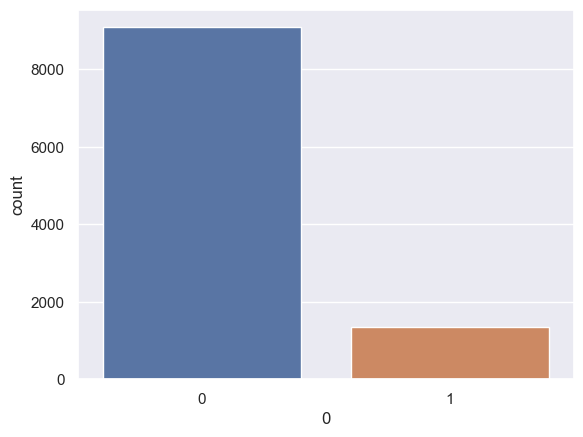

In [3]:
X_train = combined_3.drop('0', axis=1)
y_train = combined_3['0']

sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [4]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

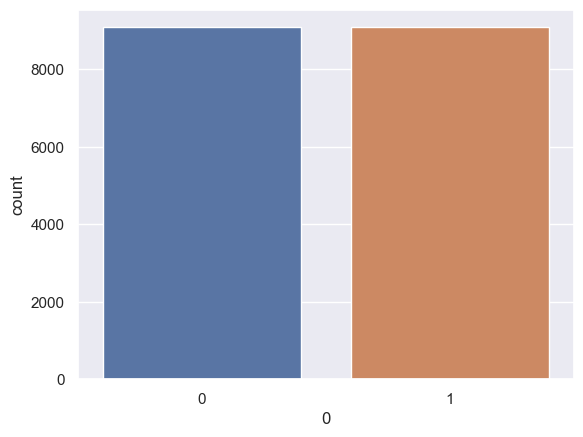

In [5]:
sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [7]:
time_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_3.csv")
freq_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3.dropna(inplace=True)
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,153.421875,1838,-2292,294653.587646,542.820032,564.084975,342.932292,12.5,4130,...,7.593522,10234.580155,40685.734815,5.122134,0.313456,13901.612892,10678.559553,6.244251,0.671149,3514.327963
2,0,131.567708,1939,-2020,238000.755832,487.853211,505.282909,292.234375,11.5,3959,...,6.028521,11148.230597,50536.036654,5.117607,1.699729,17126.770403,19664.364358,6.102997,1.372306,6650.968936
3,0,176.822917,2121,-1808,364779.114475,603.969465,629.321427,378.125000,14.5,3929,...,6.219703,9242.944073,36430.916995,6.523793,1.015550,12478.855363,13280.903092,6.447769,2.924348,4552.875957
4,0,140.838542,1565,-1696,172971.947890,415.898964,439.098443,262.505208,13.5,3261,...,3.127784,10868.017239,53571.436884,4.308446,2.863834,18632.071242,14799.042561,6.218893,2.455263,5130.157469
5,0,177.104167,1636,-1202,250726.270399,500.725744,531.123485,326.281250,13.0,2838,...,3.418140,11031.648049,59213.963083,6.033918,0.820188,20139.359784,13201.531524,7.895909,0.864310,4562.738818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1,304.515625,3242,-1959,248723.593506,498.721960,584.340106,389.026042,7.0,5201,...,12.734295,9452.854812,45025.510099,3.506367,8.063045,14499.439996,6454.537073,7.817407,0.361118,2170.316094
1653,1,213.895833,4000,-2151,251584.249566,501.581748,545.284950,298.302083,7.0,6151,...,9.578940,6843.040113,26953.433332,4.713681,5.602882,8675.493318,13008.823381,7.128794,1.190938,4309.503888
1654,1,210.177083,2959,-393,77490.041558,278.370332,348.804312,240.510417,4.0,3352,...,4.031755,4481.440818,24483.440498,5.088661,6.001118,8034.023519,15639.764744,8.952849,-0.832875,5171.982215
1655,1,266.463542,3212,-1181,264878.217421,514.663208,579.552445,352.036458,7.0,4393,...,3.898603,9182.877798,37472.024200,6.563156,0.425355,12313.225141,13327.581607,7.727615,0.430103,4383.276871


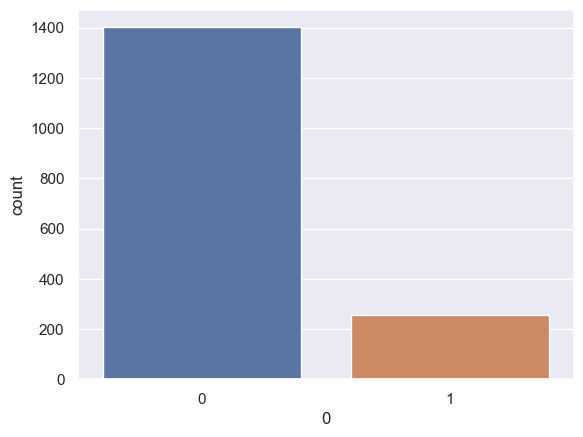

In [8]:
X_test = combined_3.drop('0', axis=1)
y_test = combined_3['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [9]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

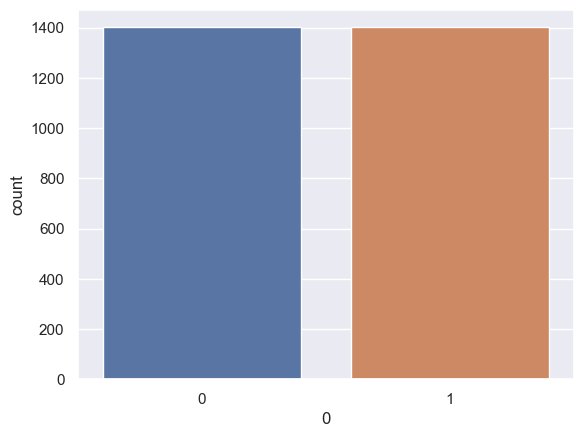

In [10]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [11]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [ ]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150, n_jobs = 16)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Accuracy on Test Set:", final_accuracy)

[I 2023-12-17 18:48:44,135] A new study created in memory with name: no-name-82d3d60f-c48d-418c-a0e1-6d6c08b40f8f


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[I 2023-12-17 18:49:43,037] Trial 7 finished with value: 0.696151932623394 and parameters: {'C': 0.3376692859145675, 'kernel': 'poly', 'degree': 3, 'gamma': 8.104076491799573, 'shrinking': True, 'tol': 0.026948637849116597, 'decision_function_shape': 'ovr', 'alpha': 0.36286609348307386}. Best is trial 7 with value: 0.696151932623394.


[LibSVM]

[I 2023-12-17 18:49:43,447] Trial 12 finished with value: 0.652856078526375 and parameters: {'C': 3686.048796107761, 'kernel': 'poly', 'degree': 3, 'gamma': 253.22181648275844, 'shrinking': False, 'tol': 0.007014391070348695, 'decision_function_shape': 'ovo', 'alpha': 0.11515930806666885}. Best is trial 7 with value: 0.696151932623394.


[LibSVM]

[I 2023-12-17 18:49:45,517] Trial 11 finished with value: 0.6873709696175582 and parameters: {'C': 0.004211873123424715, 'kernel': 'poly', 'degree': 3, 'gamma': 959.6471818450162, 'shrinking': False, 'tol': 0.003304262260536853, 'decision_function_shape': 'ovr', 'alpha': 0.3159590144385088}. Best is trial 7 with value: 0.696151932623394.


[LibSVM]

[I 2023-12-17 18:50:03,194] Trial 3 finished with value: 0.6483009992451398 and parameters: {'C': 0.3603231215606389, 'kernel': 'poly', 'degree': 4, 'gamma': 0.00913705031461902, 'shrinking': True, 'tol': 9.926647378106029e-05, 'decision_function_shape': 'ovo', 'alpha': 0.21439350227956666}. Best is trial 7 with value: 0.696151932623394.


[LibSVM]

[I 2023-12-17 18:50:25,306] Trial 16 finished with value: 0.5252280665010498 and parameters: {'C': 4791.849164893989, 'kernel': 'poly', 'degree': 2, 'gamma': 778.0747607882797, 'shrinking': True, 'tol': 0.0021274686974960483, 'decision_function_shape': 'ovo', 'alpha': 0.04090951012412847}. Best is trial 7 with value: 0.696151932623394.


[LibSVM]

[I 2023-12-17 18:50:30,733] Trial 14 finished with value: 0.8109808497235972 and parameters: {'C': 608.8393341112945, 'kernel': 'rbf', 'degree': 3, 'gamma': 6.506148123443229e-05, 'shrinking': False, 'tol': 2.3413298002525215e-05, 'decision_function_shape': 'ovr', 'alpha': 0.33702686762777745}. Best is trial 14 with value: 0.8109808497235972.


[LibSVM]

[I 2023-12-17 18:50:31,626] Trial 13 finished with value: 0.9169139978060059 and parameters: {'C': 0.006546104452552659, 'kernel': 'linear', 'degree': 1, 'gamma': 0.3476331621887517, 'shrinking': False, 'tol': 0.0003343027287528358, 'decision_function_shape': 'ovo', 'alpha': 0.6933811370710641}. Best is trial 13 with value: 0.9169139978060059.


[LibSVM]

[I 2023-12-17 18:51:24,322] Trial 18 finished with value: 0.9101107332942684 and parameters: {'C': 0.004352474136808803, 'kernel': 'linear', 'degree': 6, 'gamma': 1.4027625988978636, 'shrinking': False, 'tol': 0.00880714422048443, 'decision_function_shape': 'ovr', 'alpha': 0.5429065882809668}. Best is trial 13 with value: 0.9169139978060059.


[LibSVM]

[I 2023-12-17 18:52:19,556] Trial 5 finished with value: 0.9408323639009184 and parameters: {'C': 2.156087710055735, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 2.5746972396529478e-05, 'shrinking': False, 'tol': 1.0226125315463298e-05, 'decision_function_shape': 'ovo', 'alpha': 0.6168250513219953}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:52:48,817] Trial 0 finished with value: 0.2817438923413017 and parameters: {'C': 6.340738728974503, 'kernel': 'rbf', 'degree': 5, 'gamma': 0.014458969779842122, 'shrinking': True, 'tol': 0.04161915176866372, 'decision_function_shape': 'ovo', 'alpha': 0.7682424977146524}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:53:13,217] Trial 23 finished with value: 0.8911765377252204 and parameters: {'C': 77.4232251787423, 'kernel': 'rbf', 'degree': 7, 'gamma': 1.8210588667506613e-05, 'shrinking': False, 'tol': 1.402704182093227e-05, 'decision_function_shape': 'ovr', 'alpha': 0.0030613546897314547}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:53:27,299] Trial 4 finished with value: 0.45481910872941983 and parameters: {'C': 7975.917160920679, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 871.4030023039959, 'shrinking': False, 'tol': 0.00024395021803865814, 'decision_function_shape': 'ovo', 'alpha': 0.2268024405962511}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:54:16,478] Trial 17 finished with value: 0.5463998362149542 and parameters: {'C': 32.47525686821303, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 19667.507611255474, 'shrinking': False, 'tol': 7.312098476536217e-05, 'decision_function_shape': 'ovo', 'alpha': 0.5550322064261309}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:54:19,189] Trial 8 finished with value: 0.4319475138666338 and parameters: {'C': 2.2461607737622016, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 0.33881178410857404, 'shrinking': False, 'tol': 0.0013059904611697907, 'decision_function_shape': 'ovo', 'alpha': 0.14988285031045478}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:55:04,765] Trial 2 finished with value: 0.7468890852926211 and parameters: {'C': 2.4381970072599884e-05, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 21812.932688061566, 'shrinking': False, 'tol': 0.01813968937947639, 'decision_function_shape': 'ovr', 'alpha': 0.9702846152898441}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:55:07,056] Trial 9 finished with value: 0.7072552281765951 and parameters: {'C': 0.0009666980047311131, 'kernel': 'poly', 'degree': 1, 'gamma': 0.0014824369234551179, 'shrinking': True, 'tol': 0.002046100226950888, 'decision_function_shape': 'ovo', 'alpha': 0.9296818040617179}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:55:20,894] Trial 10 finished with value: 0.7264198632486666 and parameters: {'C': 0.00018849536461927865, 'kernel': 'sigmoid', 'degree': 5, 'gamma': 6098.333556029738, 'shrinking': True, 'tol': 0.00013866190015717562, 'decision_function_shape': 'ovr', 'alpha': 0.9377851431253554}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:55:30,540] Trial 15 finished with value: 0.8385306693160323 and parameters: {'C': 2.6074584346871816, 'kernel': 'linear', 'degree': 5, 'gamma': 15422.140691664017, 'shrinking': True, 'tol': 0.0012568815914312088, 'decision_function_shape': 'ovr', 'alpha': 0.7845005009231188}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:56:12,534] Trial 21 finished with value: 0.41256643715583924 and parameters: {'C': 9.810304510821213e-05, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 9.484498669025785e-05, 'shrinking': False, 'tol': 0.00022771607332352318, 'decision_function_shape': 'ovr', 'alpha': 0.6212575932044853}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:56:26,523] Trial 30 finished with value: 0.9176761677204159 and parameters: {'C': 0.007836494306921939, 'kernel': 'linear', 'degree': 1, 'gamma': 0.0005000335718175515, 'shrinking': False, 'tol': 0.0005395982713417617, 'decision_function_shape': 'ovo', 'alpha': 0.6982985449349097}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:56:34,985] Trial 24 finished with value: 0.9093382425224776 and parameters: {'C': 0.0006454009033891831, 'kernel': 'sigmoid', 'degree': 4, 'gamma': 0.17169002609376088, 'shrinking': False, 'tol': 2.0381874624120145e-05, 'decision_function_shape': 'ovo', 'alpha': 0.7474956498933225}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:56:54,483] Trial 31 finished with value: 0.8688267536542199 and parameters: {'C': 0.06582103444437971, 'kernel': 'linear', 'degree': 4, 'gamma': 0.00034636546572517203, 'shrinking': False, 'tol': 0.0004397611386546197, 'decision_function_shape': 'ovo', 'alpha': 0.6817514673664339}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:57:00,401] Trial 32 finished with value: 0.8713069889836995 and parameters: {'C': 0.05628007906118838, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0002829524992474809, 'shrinking': False, 'tol': 0.0004518699940986644, 'decision_function_shape': 'ovo', 'alpha': 0.7089864173878044}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:57:04,330] Trial 33 finished with value: 0.8679960094461894 and parameters: {'C': 0.0434454683360742, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0004174523164569894, 'shrinking': False, 'tol': 0.0004046462610434996, 'decision_function_shape': 'ovo', 'alpha': 0.6751715965200789}. Best is trial 5 with value: 0.9408323639009184.


[LibSVM]

[I 2023-12-17 18:57:53,704] Trial 28 finished with value: 0.9494058103389018 and parameters: {'C': 1.7666399063454455e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.0033884218173578593, 'shrinking': False, 'tol': 0.0004876541684095144, 'decision_function_shape': 'ovo', 'alpha': 0.9550513723752516}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:57:54,793] Trial 19 finished with value: 0.0 and parameters: {'C': 20837.78159454538, 'kernel': 'rbf', 'degree': 6, 'gamma': 29135.057821331047, 'shrinking': False, 'tol': 0.003601049249522408, 'decision_function_shape': 'ovo', 'alpha': 0.6519239777896065}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:57:56,385] Trial 25 finished with value: 0.4714988767335909 and parameters: {'C': 3.152537592939053e-05, 'kernel': 'sigmoid', 'degree': 7, 'gamma': 1.6680325709614305e-05, 'shrinking': False, 'tol': 1.2518737002402532e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9797798059630155}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:57:57,986] Trial 35 finished with value: 0.8644142842313679 and parameters: {'C': 0.02028319734000088, 'kernel': 'linear', 'degree': 4, 'gamma': 0.0005847447062816719, 'shrinking': False, 'tol': 4.196873961533665e-05, 'decision_function_shape': 'ovo', 'alpha': 0.44256263666967927}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:09,114] Trial 36 finished with value: 0.8747103165100754 and parameters: {'C': 0.030615053745957372, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0007650732829929917, 'shrinking': False, 'tol': 0.0004446952781809322, 'decision_function_shape': 'ovo', 'alpha': 0.6531695339359328}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:11,354] Trial 29 finished with value: 0.9470515148306572 and parameters: {'C': 1.2488042840553285e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00047351951744616593, 'shrinking': False, 'tol': 0.00042563664910826525, 'decision_function_shape': 'ovo', 'alpha': 0.9763436314525449}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:18,644] Trial 26 finished with value: 0.6467283465008423 and parameters: {'C': 0.00018501437668776692, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.0035415996336179705, 'shrinking': False, 'tol': 0.0002501246955393852, 'decision_function_shape': 'ovo', 'alpha': 0.8052750266085016}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:24,645] Trial 37 finished with value: 0.8943868179211187 and parameters: {'C': 0.02541193857110743, 'kernel': 'linear', 'degree': 2, 'gamma': 0.006526522317623208, 'shrinking': False, 'tol': 0.0004734875129266884, 'decision_function_shape': 'ovo', 'alpha': 0.8533210724208935}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:30,584] Trial 27 finished with value: 0.6406871186403608 and parameters: {'C': 2.5597539962381664e-05, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.004917394225222267, 'shrinking': False, 'tol': 0.000339139923606988, 'decision_function_shape': 'ovo', 'alpha': 0.7656079424915841}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:35,501] Trial 39 finished with value: 0.9016577454298023 and parameters: {'C': 0.008674779533699233, 'kernel': 'linear', 'degree': 1, 'gamma': 0.009334010912028142, 'shrinking': False, 'tol': 4.539096635511709e-05, 'decision_function_shape': 'ovo', 'alpha': 0.44819079790014066}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:58:45,842] Trial 38 finished with value: 0.8527970056355861 and parameters: {'C': 0.036166965130781305, 'kernel': 'linear', 'degree': 2, 'gamma': 1.1625994225325933e-05, 'shrinking': False, 'tol': 5.548017417197577e-05, 'decision_function_shape': 'ovo', 'alpha': 0.4581523221848776}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 18:59:28,223] Trial 34 finished with value: 0.8703137840717418 and parameters: {'C': 0.13892839548011257, 'kernel': 'linear', 'degree': 2, 'gamma': 23.915525964587037, 'shrinking': False, 'tol': 2.8032306568286672e-05, 'decision_function_shape': 'ovo', 'alpha': 0.755062749616285}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 19:00:24,467] Trial 43 finished with value: 0.9261181886449823 and parameters: {'C': 0.00028764887696507255, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0040717129129428644, 'shrinking': False, 'tol': 0.08106745469853549, 'decision_function_shape': 'ovo', 'alpha': 0.4504189729425575}. Best is trial 28 with value: 0.9494058103389018.


[LibSVM]

[I 2023-12-17 19:01:25,668] Trial 41 finished with value: 0.9496699978391627 and parameters: {'C': 4.077052957855411e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 1.2849607970005787e-05, 'shrinking': False, 'tol': 3.260087603222304e-05, 'decision_function_shape': 'ovo', 'alpha': 0.8615016606044983}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:01:36,513] Trial 40 finished with value: 0.9478479467834154 and parameters: {'C': 3.1091772590127085e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.008374077810759786, 'shrinking': False, 'tol': 4.1186038445534566e-05, 'decision_function_shape': 'ovo', 'alpha': 0.8472835797953019}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:02:26,008] Trial 47 finished with value: 0.9452422690632429 and parameters: {'C': 2.2508372221502256e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.05863827445515767, 'shrinking': False, 'tol': 0.08276084152882829, 'decision_function_shape': 'ovo', 'alpha': 0.8595665624797139}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:02:31,777] Trial 45 finished with value: 0.9414274693565352 and parameters: {'C': 1.478210588066367e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.008484537136579203, 'shrinking': False, 'tol': 0.06027975021213368, 'decision_function_shape': 'ovo', 'alpha': 0.8515210912288648}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:02:38,457] Trial 46 finished with value: 0.9439001600335721 and parameters: {'C': 1.5868915754835807e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.019162465621269772, 'shrinking': False, 'tol': 0.0007960582900327439, 'decision_function_shape': 'ovo', 'alpha': 0.8540480926840457}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:03:02,191] Trial 48 finished with value: 0.9422411636526771 and parameters: {'C': 1.2751597285412072e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.06677447085423506, 'shrinking': False, 'tol': 0.0009113751556367563, 'decision_function_shape': 'ovo', 'alpha': 0.8721133332259416}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:03:22,824] Trial 50 finished with value: 0.9405321967426645 and parameters: {'C': 1.2089362036846081e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.02993427425961411, 'shrinking': False, 'tol': 0.0006982132899821505, 'decision_function_shape': 'ovo', 'alpha': 0.8528599637275964}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:04:45,826] Trial 51 finished with value: 0.9360953639659688 and parameters: {'C': 1.021430557370338e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 8.214232114822031e-05, 'shrinking': True, 'tol': 0.001117861873504848, 'decision_function_shape': 'ovo', 'alpha': 0.8787880075180639}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:05:21,382] Trial 52 finished with value: 0.9402137644108958 and parameters: {'C': 1.3902565296189074e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.055205399426873435, 'shrinking': True, 'tol': 0.0914836206872749, 'decision_function_shape': 'ovo', 'alpha': 0.8925358061695694}. Best is trial 41 with value: 0.9496699978391627.


[LibSVM]

[I 2023-12-17 19:06:09,043] Trial 57 finished with value: 0.9548326731120031 and parameters: {'C': 9.843214777489201e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.1031063542569177, 'shrinking': True, 'tol': 0.00015242269034481166, 'decision_function_shape': 'ovo', 'alpha': 0.9203855327861871}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:06:21,186] Trial 54 finished with value: 0.9468854657702411 and parameters: {'C': 2.1044651780992317e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.04067342125376453, 'shrinking': True, 'tol': 0.00013039425582042128, 'decision_function_shape': 'ovo', 'alpha': 0.8774933761443685}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:06:31,227] Trial 56 finished with value: 0.9516679927160312 and parameters: {'C': 4.758405975468102e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.017917181200608635, 'shrinking': True, 'tol': 0.00011267192467876698, 'decision_function_shape': 'ovo', 'alpha': 0.9029055862888338}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:06:44,294] Trial 58 finished with value: 0.9547711044423233 and parameters: {'C': 6.988981391734867e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.040135342574544555, 'shrinking': True, 'tol': 0.00014885195697827964, 'decision_function_shape': 'ovo', 'alpha': 0.9197654892570413}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:07:00,549] Trial 59 finished with value: 0.9547581443818429 and parameters: {'C': 8.2638706680907e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 6.161661072198278e-05, 'shrinking': True, 'tol': 0.00014191187849029165, 'decision_function_shape': 'ovo', 'alpha': 0.9184242375105762}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:07:42,494] Trial 55 finished with value: 0.9434937271020193 and parameters: {'C': 1.2677086886913214e-05, 'kernel': 'linear', 'degree': 3, 'gamma': 0.029966397789102567, 'shrinking': True, 'tol': 0.00012127030073323582, 'decision_function_shape': 'ovo', 'alpha': 0.8902220921084202}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:08:33,653] Trial 65 finished with value: 0.9342009212013421 and parameters: {'C': 0.0012103362412134062, 'kernel': 'poly', 'degree': 1, 'gamma': 3.796504122153625, 'shrinking': True, 'tol': 0.00010008710337133347, 'decision_function_shape': 'ovr', 'alpha': 0.9390799238455803}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:09:06,057] Trial 53 finished with value: 0.0 and parameters: {'C': 1.4570155213038991e-05, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.03436349251183601, 'shrinking': True, 'tol': 0.00011696463370637333, 'decision_function_shape': 'ovo', 'alpha': 0.8786799222304245}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:10:29,882] Trial 67 finished with value: 0.9465805520379336 and parameters: {'C': 0.0012111092818028386, 'kernel': 'poly', 'degree': 1, 'gamma': 0.29517601364305257, 'shrinking': True, 'tol': 8.839025936539387e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9363990809434414}. Best is trial 57 with value: 0.9548326731120031.


[LibSVM]

[I 2023-12-17 19:10:31,984] Trial 66 finished with value: 0.9552508964810746 and parameters: {'C': 8.911825082022488e-05, 'kernel': 'poly', 'degree': 1, 'gamma': 1.0266924995177178, 'shrinking': True, 'tol': 0.00012130945334989018, 'decision_function_shape': 'ovo', 'alpha': 0.9207488526826443}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:12:33,649] Trial 60 finished with value: 0.7746480284935475 and parameters: {'C': 6.787022770167582e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.001852386118190808, 'shrinking': True, 'tol': 9.533228642925668e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9413039676028386}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:13:02,134] Trial 61 finished with value: 0.7465327811808926 and parameters: {'C': 7.025541557032281e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.0016245281450555304, 'shrinking': True, 'tol': 0.00014779788614449824, 'decision_function_shape': 'ovo', 'alpha': 0.9933419420854814}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:13:52,228] Trial 62 finished with value: 0.7832118893527203 and parameters: {'C': 6.0580960253844884e-05, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.0018703239850762375, 'shrinking': True, 'tol': 0.00010523470569703237, 'decision_function_shape': 'ovo', 'alpha': 0.9962390631816052}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:13:54,915] Trial 64 finished with value: 0.0 and parameters: {'C': 0.0013945987503182395, 'kernel': 'rbf', 'degree': 3, 'gamma': 2.384382934333611, 'shrinking': True, 'tol': 0.00010460229337464119, 'decision_function_shape': 'ovr', 'alpha': 0.9402067251596474}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:13:55,744] Trial 73 finished with value: 0.7738415629653157 and parameters: {'C': 0.00042754553776896693, 'kernel': 'poly', 'degree': 3, 'gamma': 1.1786617921937657, 'shrinking': True, 'tol': 0.00018968580512359207, 'decision_function_shape': 'ovr', 'alpha': 0.8100096195589844}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:14:04,582] Trial 63 finished with value: 0.7713421730389359 and parameters: {'C': 8.437099137586311e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.0018179611350266633, 'shrinking': True, 'tol': 9.530003827684304e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9441788744288075}. Best is trial 66 with value: 0.9552508964810746.


[LibSVM]

[I 2023-12-17 19:14:05,340] Trial 71 finished with value: 0.9579033124415555 and parameters: {'C': 8.696344650682286e-05, 'kernel': 'poly', 'degree': 1, 'gamma': 0.9418500429653686, 'shrinking': True, 'tol': 0.00016787195044007364, 'decision_function_shape': 'ovr', 'alpha': 0.9923434344718789}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:14:15,596] Trial 69 finished with value: 0.9476648469019205 and parameters: {'C': 7.747436458875312e-05, 'kernel': 'poly', 'degree': 1, 'gamma': 0.15926145180849055, 'shrinking': True, 'tol': 0.00018518870754531414, 'decision_function_shape': 'ovo', 'alpha': 0.9967899027795606}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:15:16,860] Trial 72 finished with value: 0.9395271686418415 and parameters: {'C': 0.0004673885385293096, 'kernel': 'poly', 'degree': 1, 'gamma': 0.8484460425168896, 'shrinking': True, 'tol': 0.00020307822313872398, 'decision_function_shape': 'ovr', 'alpha': 0.80943783273549}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:15:47,430] Trial 68 finished with value: 0.0 and parameters: {'C': 9.863333751249048e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 0.3019443065628378, 'shrinking': True, 'tol': 0.00019800195227303018, 'decision_function_shape': 'ovo', 'alpha': 0.9279773410552034}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:16:05,069] Trial 78 finished with value: 0.9316833269171264 and parameters: {'C': 0.00018459540987489974, 'kernel': 'poly', 'degree': 1, 'gamma': 13.502546457936365, 'shrinking': True, 'tol': 6.235885537549887e-05, 'decision_function_shape': 'ovr', 'alpha': 0.8211918181087429}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:16:18,204] Trial 74 finished with value: 0.9397126227128582 and parameters: {'C': 0.0004729714368873893, 'kernel': 'poly', 'degree': 1, 'gamma': 1.544009556459445, 'shrinking': True, 'tol': 0.0001940268968871863, 'decision_function_shape': 'ovr', 'alpha': 0.812071290703166}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:16:35,311] Trial 75 finished with value: 0.9396612797348631 and parameters: {'C': 0.00046097421394480936, 'kernel': 'poly', 'degree': 1, 'gamma': 0.9214645179424098, 'shrinking': True, 'tol': 6.512954850531012e-05, 'decision_function_shape': 'ovr', 'alpha': 0.7946661808898379}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:16:51,673] Trial 82 finished with value: 0.6162153523873859 and parameters: {'C': 0.00019080553171131986, 'kernel': 'poly', 'degree': 2, 'gamma': 30.44541326659908, 'shrinking': True, 'tol': 2.9744363553753696e-05, 'decision_function_shape': 'ovr', 'alpha': 0.9067313883057316}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:17:13,410] Trial 80 finished with value: 0.9386092987998795 and parameters: {'C': 0.000218983099109093, 'kernel': 'poly', 'degree': 1, 'gamma': 13.190604627586413, 'shrinking': True, 'tol': 6.347068958375883e-05, 'decision_function_shape': 'ovr', 'alpha': 0.9080274265647427}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:17:37,170] Trial 79 finished with value: 0.9506284963740357 and parameters: {'C': 0.00017939284447401646, 'kernel': 'poly', 'degree': 1, 'gamma': 0.6065141827937681, 'shrinking': True, 'tol': 0.00027194547010008787, 'decision_function_shape': 'ovr', 'alpha': 0.8091558042490525}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:18:12,029] Trial 70 finished with value: 0.6218108598398487 and parameters: {'C': 9.097510529037186e-05, 'kernel': 'rbf', 'degree': 1, 'gamma': 3.313219507558041e-05, 'shrinking': True, 'tol': 0.00019087731186402811, 'decision_function_shape': 'ovo', 'alpha': 0.9934858941663132}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:19:10,303] Trial 86 finished with value: 0.9397935874220944 and parameters: {'C': 0.0024064888870006843, 'kernel': 'linear', 'degree': 1, 'gamma': 0.11772041878227113, 'shrinking': True, 'tol': 0.0002928925046176918, 'decision_function_shape': 'ovo', 'alpha': 0.9763413061896925}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:19:23,171] Trial 88 finished with value: 0.8067230643714567 and parameters: {'C': 0.0024751578951261433, 'kernel': 'poly', 'degree': 2, 'gamma': 0.11750751798400501, 'shrinking': True, 'tol': 0.0003520942984184934, 'decision_function_shape': 'ovr', 'alpha': 0.9695058748711577}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:21:07,248] Trial 76 finished with value: 0.44180264524737656 and parameters: {'C': 0.00014210343199400435, 'kernel': 'poly', 'degree': 1, 'gamma': 4.875922720694837e-05, 'shrinking': True, 'tol': 0.00019882694925965497, 'decision_function_shape': 'ovo', 'alpha': 0.8127654916587788}. Best is trial 71 with value: 0.9579033124415555.
[I 2023-12-17 19:21:07,485] Trial 90 finished with value: 0.8263046969575528 and parameters: {'C': 3.9342747329911304e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 0.4468133224337135, 'shrinking': True, 'tol': 0.0002740597303287336, 'decision_function_shape': 'ovr', 'alpha': 0.9160685183153711}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM][LibSVM]

[I 2023-12-17 19:21:20,184] Trial 77 finished with value: 0.4415900430656713 and parameters: {'C': 0.00018546611690266804, 'kernel': 'poly', 'degree': 1, 'gamma': 3.48345644071204e-05, 'shrinking': True, 'tol': 0.0002044347364975937, 'decision_function_shape': 'ovo', 'alpha': 0.8115697975986228}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:22:57,311] Trial 81 finished with value: 0.4578842710422575 and parameters: {'C': 0.00020570968356274012, 'kernel': 'poly', 'degree': 1, 'gamma': 4.778693566518318e-05, 'shrinking': True, 'tol': 0.00028667399607667046, 'decision_function_shape': 'ovr', 'alpha': 0.9032100218435671}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:23:31,337] Trial 83 finished with value: 0.0 and parameters: {'C': 0.002228808646767002, 'kernel': 'poly', 'degree': 2, 'gamma': 4.064485310323271e-05, 'shrinking': True, 'tol': 0.0002784907742050117, 'decision_function_shape': 'ovr', 'alpha': 0.9091126111663024}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:23:44,121] Trial 84 finished with value: 0.0 and parameters: {'C': 0.0028195220346121396, 'kernel': 'poly', 'degree': 2, 'gamma': 3.3533397738962966e-05, 'shrinking': True, 'tol': 2.3308661918638056e-05, 'decision_function_shape': 'ovr', 'alpha': 0.909856133309709}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:24:03,019] Trial 85 finished with value: 0.0 and parameters: {'C': 4.05124437104191e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 2.6658208976987605e-05, 'shrinking': True, 'tol': 0.00029234344741030534, 'decision_function_shape': 'ovo', 'alpha': 0.9135636769144884}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:24:42,315] Trial 87 finished with value: 0.0 and parameters: {'C': 3.8750261058784094e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 3.422245551135142e-05, 'shrinking': True, 'tol': 0.0002627318970314954, 'decision_function_shape': 'ovr', 'alpha': 0.7334379267690309}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:25:03,652] Trial 92 finished with value: 0.9450193100777496 and parameters: {'C': 4.437208380121071e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 0.00014233638476417594, 'shrinking': True, 'tol': 2.0235498069266293e-05, 'decision_function_shape': 'ovr', 'alpha': 0.7232768314293134}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:25:20,694] Trial 93 finished with value: 0.9445643747089811 and parameters: {'C': 4.1254539461950054e-05, 'kernel': 'linear', 'degree': 2, 'gamma': 6.316262240457613, 'shrinking': True, 'tol': 1.7847272401123268e-05, 'decision_function_shape': 'ovr', 'alpha': 0.734376744801821}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:26:27,836] Trial 89 finished with value: 0.0 and parameters: {'C': 3.845917957886941e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 3.355156397905493e-05, 'shrinking': True, 'tol': 0.0002913664493633749, 'decision_function_shape': 'ovr', 'alpha': 0.7455563116081478}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:27:08,546] Trial 98 finished with value: 0.9469778704324009 and parameters: {'C': 0.00073309828902934, 'kernel': 'linear', 'degree': 1, 'gamma': 0.0001718071572643433, 'shrinking': True, 'tol': 0.0006383283667722141, 'decision_function_shape': 'ovo', 'alpha': 0.9567760699719589}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:27:34,576] Trial 95 finished with value: 0.9454483836257345 and parameters: {'C': 4.3166163476973135e-05, 'kernel': 'linear', 'degree': 4, 'gamma': 0.00019259959434917632, 'shrinking': True, 'tol': 3.472026559457524e-05, 'decision_function_shape': 'ovo', 'alpha': 0.7454101096070864}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:27:41,075] Trial 96 finished with value: 0.9455854504123465 and parameters: {'C': 4.654663125527264e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.017340800303943218, 'shrinking': True, 'tol': 0.0006253000589670632, 'decision_function_shape': 'ovo', 'alpha': 0.7376812015618871}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:28:23,344] Trial 91 finished with value: 0.0 and parameters: {'C': 3.895147770516024e-05, 'kernel': 'poly', 'degree': 2, 'gamma': 0.00018037520899555514, 'shrinking': True, 'tol': 0.0002588518124005999, 'decision_function_shape': 'ovr', 'alpha': 0.7187229456654667}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:28:25,191] Trial 97 finished with value: 0.9423252320286999 and parameters: {'C': 3.050809560653681e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00024516624610146153, 'shrinking': True, 'tol': 4.8293166502272134e-05, 'decision_function_shape': 'ovo', 'alpha': 0.7246661775292289}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:29:57,694] Trial 101 finished with value: 0.8577980298363898 and parameters: {'C': 0.5758112493060772, 'kernel': 'linear', 'degree': 1, 'gamma': 0.015902096345939015, 'shrinking': True, 'tol': 0.00014750318798232814, 'decision_function_shape': 'ovo', 'alpha': 0.836506045543431}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:32:14,205] Trial 104 finished with value: 0.6242229585526179 and parameters: {'C': 0.7318746470099762, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.40809705085354603, 'shrinking': True, 'tol': 0.0014814154361764231, 'decision_function_shape': 'ovo', 'alpha': 0.8371373876065947}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:32:14,877] Trial 105 finished with value: 0.6241952304927091 and parameters: {'C': 18.85264934537073, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.49746532424703593, 'shrinking': False, 'tol': 0.0001572512781357589, 'decision_function_shape': 'ovo', 'alpha': 0.8407526066394383}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:33:10,368] Trial 107 finished with value: 0.9561664481405925 and parameters: {'C': 0.0001191804868552996, 'kernel': 'linear', 'degree': 1, 'gamma': 0.5705603255034768, 'shrinking': False, 'tol': 3.7213541000892946e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9614252972195764}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:35:57,360] Trial 110 finished with value: 0.9470289711721249 and parameters: {'C': 0.0003651033542950455, 'kernel': 'linear', 'degree': 1, 'gamma': 1.3675739107889809e-05, 'shrinking': False, 'tol': 8.490387060602287e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9606685200870296}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:36:40,024] Trial 109 finished with value: 0.9437855750871691 and parameters: {'C': 2.206016432211738e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.0008359181521431882, 'shrinking': False, 'tol': 5.151759965713341e-05, 'decision_function_shape': 'ovo', 'alpha': 0.7832560192687392}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:36:40,904] Trial 108 finished with value: 0.9203498822162712 and parameters: {'C': 2.1038990781352026e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.0009072639702037375, 'shrinking': False, 'tol': 7.773262995512721e-05, 'decision_function_shape': 'ovo', 'alpha': 0.24764163409348017}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:39:18,525] Trial 111 finished with value: 0.9303966005388251 and parameters: {'C': 0.00010292809876210113, 'kernel': 'linear', 'degree': 1, 'gamma': 2.524442338441308, 'shrinking': False, 'tol': 1.3700765101336356e-05, 'decision_function_shape': 'ovo', 'alpha': 0.29398523691347156}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:39:55,907] Trial 112 finished with value: 0.956350171405993 and parameters: {'C': 0.00011825019270214182, 'kernel': 'linear', 'degree': 1, 'gamma': 0.231659989874252, 'shrinking': False, 'tol': 7.816071447636187e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9661594072266398}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:39:59,690] Trial 113 finished with value: 0.9569949171676525 and parameters: {'C': 0.00011018355584732177, 'kernel': 'linear', 'degree': 1, 'gamma': 2.5242472392173965, 'shrinking': False, 'tol': 1.4110452999848523e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9658642160312423}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:41:47,143] Trial 114 finished with value: 0.9465068649487778 and parameters: {'C': 0.0008139681781138274, 'kernel': 'linear', 'degree': 4, 'gamma': 0.08588688915139789, 'shrinking': False, 'tol': 3.657173319896123e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9549958880519988}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:43:30,473] Trial 116 finished with value: 0.9564183729502385 and parameters: {'C': 0.00010127989790098934, 'kernel': 'linear', 'degree': 1, 'gamma': 0.21879781918249983, 'shrinking': False, 'tol': 1.0123450261675244e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9632700590959921}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:45:00,892] Trial 117 finished with value: 0.9512604699030696 and parameters: {'C': 0.00012536691747260298, 'kernel': 'linear', 'degree': 1, 'gamma': 0.7055920010627118, 'shrinking': False, 'tol': 7.414202519824851e-05, 'decision_function_shape': 'ovo', 'alpha': 0.8756682902587226}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:46:23,849] Trial 118 finished with value: 0.9566552361182844 and parameters: {'C': 0.0001180224908645632, 'kernel': 'linear', 'degree': 5, 'gamma': 0.2045310673850342, 'shrinking': False, 'tol': 1.0352193269690692e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9740201966814361}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:48:49,748] Trial 120 finished with value: 0.9502147882917744 and parameters: {'C': 0.00028699156340503124, 'kernel': 'linear', 'degree': 5, 'gamma': 0.20582121729517608, 'shrinking': False, 'tol': 1.0530055794600242e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9675464449031376}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:53:56,320] Trial 99 finished with value: 0.8090998320448198 and parameters: {'C': 19.513522292680744, 'kernel': 'linear', 'degree': 1, 'gamma': 4.738294210887938, 'shrinking': True, 'tol': 0.0006385332018461064, 'decision_function_shape': 'ovo', 'alpha': 0.959608807930177}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 19:57:13,188] Trial 122 finished with value: 0.9571290270763092 and parameters: {'C': 6.917713752436675e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 1.8753301217556073, 'shrinking': False, 'tol': 1.1576624910238e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9820385245346431}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

[I 2023-12-17 20:00:06,649] Trial 123 finished with value: 0.9555512028750098 and parameters: {'C': 0.00012989860281944503, 'kernel': 'linear', 'degree': 5, 'gamma': 2.40866915566097, 'shrinking': False, 'tol': 1.0640646670514298e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9819755378994005}. Best is trial 71 with value: 0.9579033124415555.


[LibSVM]

In [12]:
model = SVC(C=8.696344650682286e-05, kernel='poly', degree=1, gamma=0.9418500429653686,
                shrinking=True, tol=0.00016787195044007364, decision_function_shape='ovr', random_state=42, verbose=2)
model.fit(X_train, y_train)

[LibSVM]

SVC(C=8.696344650682286e-05, degree=1, gamma=0.9418500429653686, kernel='poly',
    random_state=42, tol=0.00016787195044007364, verbose=2)

In [13]:
y_pred = model.predict(X_test)

In [14]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.9921484653818701

In [15]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.926481084939329

In [3]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4.dropna(inplace=True)
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,-64.207031,30,-151,7.836564e+02,27.993863,70.044266,64.910156,5.0,181,...,8.074267,591.147339,2121.843774,5.701104,4.118528,534.625626,1965.920654,8.799223,-0.635598,480.502503
2,0,-83.085938,20,-181,1.249969e+03,35.354903,90.295305,83.398438,2.0,201,...,8.862616,778.390069,3356.942396,5.237612,3.332824,834.286699,2093.462322,7.922701,-0.664292,519.812617
3,0,-89.230469,-20,-151,5.732477e+02,23.942591,92.386818,89.230469,0.0,131,...,5.439952,914.008308,3375.674577,6.255571,4.253770,857.108322,2579.936457,7.655488,-0.260433,655.607710
4,0,-76.101562,60,-212,7.454037e+02,27.302083,80.850798,76.960938,2.0,272,...,6.599605,497.176223,1082.114809,6.752687,1.699364,260.454781,2076.763398,7.302621,0.720758,505.457001
5,0,-82.449219,40,-212,6.380209e+02,25.259075,86.231633,82.761719,1.0,252,...,2.266726,286.244989,1153.981560,6.898427,1.626962,278.824606,1581.271985,9.813141,-1.124961,394.765924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,1,161.144531,383,-383,5.407889e+03,73.538352,177.131164,167.753906,3.0,766,...,3.965371,4549.366911,15111.622967,4.607199,6.011978,3933.202947,6719.826747,8.629356,-0.312842,1631.771299
10434,1,198.644531,2363,-656,7.721007e+04,277.867006,341.569499,239.863281,8.0,3019,...,13.065783,7531.897988,36160.417718,4.657606,4.078617,8981.036711,17400.748115,9.025834,-0.994646,4321.605056
10435,1,234.566406,2424,-787,1.218144e+05,349.019155,420.518453,282.144531,9.0,3211,...,19.693981,9455.758937,33456.691404,4.267879,8.224732,8339.322615,7733.375090,8.022866,1.462761,1910.760716
10436,1,204.371094,1434,-727,3.928435e+04,198.202802,284.696144,230.136719,8.5,2161,...,12.469984,10238.340542,48104.954075,4.732163,6.427638,12053.592969,20131.595990,8.095157,-0.037903,5083.510376


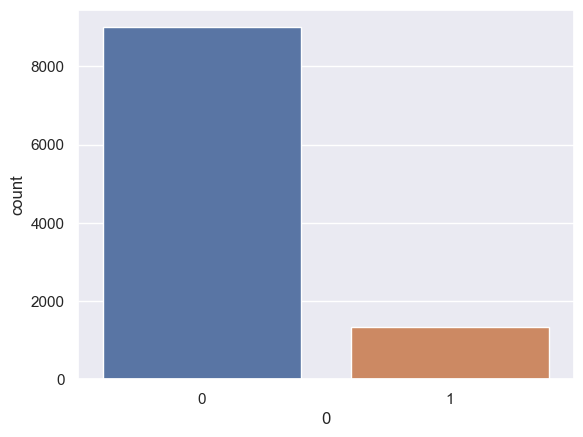

In [4]:
X_train = combined_4.drop('0', axis=1)
y_train = combined_4['0']

sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [5]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

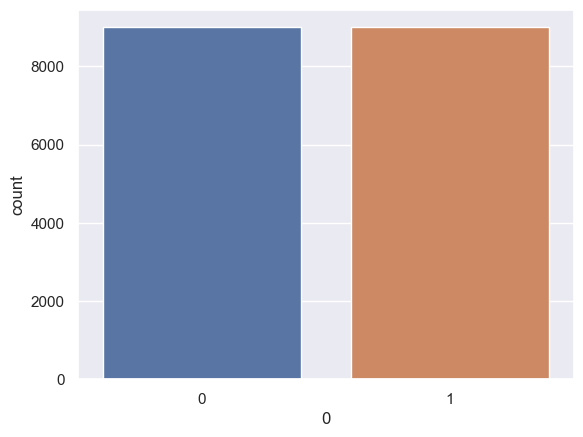

In [6]:
sb.countplot(data=pd.DataFrame(y_train), x='0')
plt.show()

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [8]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files_1\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4.dropna(inplace=True)
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,p2p_A_F,...,spectral_kurtosis_T_F,bandpower_T_F,PSD_T_V,spectral_spread_T_V,spectral_kurtosis_T_V,bandpower_T_V,PSD_T_L,spectral_spread_T_L,spectral_kurtosis_T_L,bandpower_T_L
1,0,120.906250,1838,-2292,291834.694336,540.217266,553.581986,337.203125,18.5,4130,...,7.501210,8154.744541,101289.710795,5.281374,6.529136,25214.915225,18702.184602,6.600194,1.903422,4702.477638
2,0,188.457031,2121,-2020,359463.920029,599.553100,628.474321,372.371094,17.0,4141,...,7.494167,9992.756274,55733.369784,5.854571,1.957940,14019.490113,17074.073519,5.982111,2.211674,4337.079846
3,0,147.480469,1616,-1696,208103.585556,456.183719,479.430990,286.253906,18.5,3312,...,1.890379,11496.264228,82881.245274,4.913145,1.786722,21111.611434,19348.280907,6.134125,3.218796,4915.459952
4,0,154.421875,1878,-1525,220338.689209,469.402481,494.150589,294.757812,18.0,3403,...,4.234824,8524.416190,79465.149176,5.483323,-0.144150,19923.993695,20244.662776,7.192268,0.914068,5164.974861
5,0,139.093750,2101,-1505,223587.772461,472.850687,492.884209,307.882812,21.0,3606,...,2.377008,5692.722553,65349.574485,5.074005,0.264429,16509.253363,22444.130120,5.419774,4.911356,5685.073783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,1,298.464844,5121,-2727,236366.748764,486.175636,570.480509,371.621094,7.0,7848,...,12.899149,9280.003708,31985.702006,5.254689,8.707404,7830.178765,25699.879390,8.349953,1.682462,6467.891804
1640,1,254.277344,4000,-2151,355181.731674,595.971251,647.949612,369.550781,12.0,6151,...,2.126747,17748.074927,89505.457172,6.642256,0.000306,22825.038150,25999.386614,7.249120,-0.389851,6538.394095
1641,1,211.558594,2959,-393,78557.512192,280.281131,351.161716,245.722656,6.0,3352,...,4.813419,6619.268869,30936.086183,5.343889,3.800282,7649.997555,14761.723918,9.111799,-0.516365,3784.680827
1642,1,293.226562,3616,-1757,363402.393982,602.828661,670.361254,403.617188,11.0,5373,...,4.869626,9184.895258,45343.590604,6.459832,0.652539,11216.975426,16089.336980,7.867869,-0.064450,4049.314648


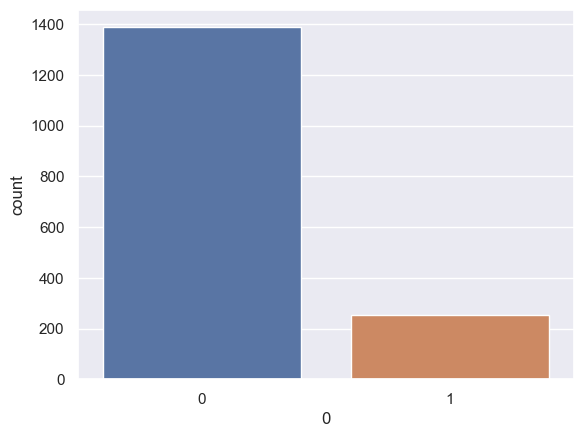

In [9]:
X_test = combined_4.drop('0', axis=1)
y_test = combined_4['0']

sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [10]:
smote = SMOTE(random_state=42)
X_test, y_test = smote.fit_resample(X_test, y_test)

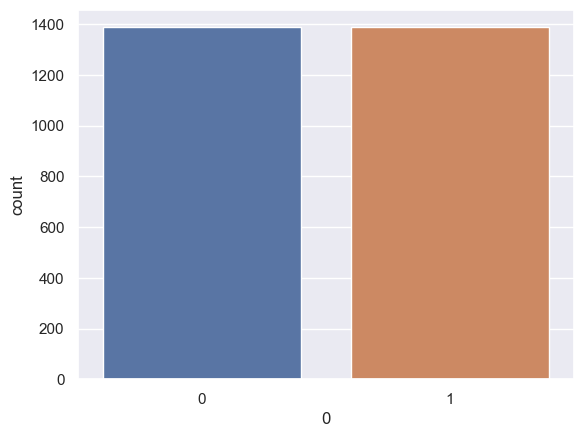

In [11]:
sb.countplot(data=pd.DataFrame(y_test), x='0')
plt.show()

In [12]:
scaler = StandardScaler()

X_test = scaler.fit_transform(X_test)

In [ ]:
# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150, n_jobs = 16)

# Get the best hyperparameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
print("Final Accuracy on Test Set:", final_accuracy)

[I 2023-12-17 20:36:42,246] A new study created in memory with name: no-name-14cbde92-ffcd-4ed3-976e-ba34152db643


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[I 2023-12-17 20:37:18,046] Trial 5 finished with value: 0.7339835648068467 and parameters: {'C': 303.12341382217653, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.0011802110606233787, 'shrinking': True, 'tol': 0.036135317453276035, 'decision_function_shape': 'ovr', 'alpha': 0.15311761989231876}. Best is trial 5 with value: 0.7339835648068467.


[LibSVM]

[I 2023-12-17 20:37:51,930] Trial 1 finished with value: 0.9357005489821663 and parameters: {'C': 7.218482002567125, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.0005425914342797256, 'shrinking': True, 'tol': 0.009615515368783778, 'decision_function_shape': 'ovr', 'alpha': 0.8042812781543291}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:37:59,413] Trial 16 finished with value: 0.6209333059875437 and parameters: {'C': 0.0009076081596172688, 'kernel': 'poly', 'degree': 2, 'gamma': 1922.6519196646657, 'shrinking': False, 'tol': 0.00028066708676960416, 'decision_function_shape': 'ovo', 'alpha': 0.5522569080205936}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:38:06,792] Trial 4 finished with value: 0.841278299770934 and parameters: {'C': 0.011106798326900251, 'kernel': 'linear', 'degree': 7, 'gamma': 179.54060240315087, 'shrinking': False, 'tol': 0.0035718738098940326, 'decision_function_shape': 'ovr', 'alpha': 0.33675924257253464}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:38:11,782] Trial 8 finished with value: 0.8468545335535567 and parameters: {'C': 5.2046866747895694e-05, 'kernel': 'poly', 'degree': 1, 'gamma': 159.5701369330994, 'shrinking': True, 'tol': 0.00022888912022933422, 'decision_function_shape': 'ovr', 'alpha': 0.243099055604739}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:38:43,962] Trial 13 finished with value: 0.826610832623035 and parameters: {'C': 60075.43017366469, 'kernel': 'rbf', 'degree': 4, 'gamma': 1.9928772370565545e-05, 'shrinking': True, 'tol': 0.0001338570493531209, 'decision_function_shape': 'ovo', 'alpha': 0.9112227513856364}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:39:18,799] Trial 17 finished with value: 0.7448128287905236 and parameters: {'C': 0.08496031436414102, 'kernel': 'linear', 'degree': 2, 'gamma': 15162.542786533846, 'shrinking': False, 'tol': 0.0074811749642452055, 'decision_function_shape': 'ovr', 'alpha': 0.5573047722000625}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:40:23,034] Trial 3 finished with value: 0.6165016261276923 and parameters: {'C': 321.1083171146951, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 1738.3474222498544, 'shrinking': True, 'tol': 9.932334470250785e-05, 'decision_function_shape': 'ovo', 'alpha': 0.7770601259033816}. Best is trial 1 with value: 0.9357005489821663.


[LibSVM]

[I 2023-12-17 20:40:25,255] Trial 0 finished with value: 0.9535524929841201 and parameters: {'C': 2.674789329156837e-05, 'kernel': 'linear', 'degree': 1, 'gamma': 0.04176788732975149, 'shrinking': False, 'tol': 0.08318378445575177, 'decision_function_shape': 'ovr', 'alpha': 0.8521546216629025}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:40:37,276] Trial 2 finished with value: 0.7994501288598252 and parameters: {'C': 0.004984856283763982, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 903.5619115700063, 'shrinking': True, 'tol': 0.0006634421334828638, 'decision_function_shape': 'ovo', 'alpha': 0.9726586414901147}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:41:10,381] Trial 23 finished with value: 0.8184500207840886 and parameters: {'C': 3864.247474856324, 'kernel': 'poly', 'degree': 3, 'gamma': 0.6023943292205216, 'shrinking': True, 'tol': 0.02548018555401138, 'decision_function_shape': 'ovr', 'alpha': 0.38232571468888954}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:42:24,306] Trial 22 finished with value: 0.7884160301322582 and parameters: {'C': 20525.160154947258, 'kernel': 'poly', 'degree': 3, 'gamma': 5.9239280561589064e-05, 'shrinking': False, 'tol': 0.0011661049310699272, 'decision_function_shape': 'ovo', 'alpha': 0.6684135791931367}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:43:25,069] Trial 15 finished with value: 0.7265118194335574 and parameters: {'C': 6.249452061392945e-05, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.6422909020028608, 'shrinking': False, 'tol': 0.00023510422635021174, 'decision_function_shape': 'ovr', 'alpha': 0.6083841190390703}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:44:12,999] Trial 24 finished with value: 0.6622830342135886 and parameters: {'C': 51125.503560916084, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.09970757059381388, 'shrinking': False, 'tol': 2.4996160445698776e-05, 'decision_function_shape': 'ovo', 'alpha': 0.9520400944168562}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:44:23,350] Trial 25 finished with value: 0.9276045627719791 and parameters: {'C': 3.7336182124940715e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.39177122237728984, 'shrinking': False, 'tol': 1.3236254513639676e-05, 'decision_function_shape': 'ovr', 'alpha': 0.02060806014627714}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:45:15,301] Trial 30 finished with value: 0.786909685051876 and parameters: {'C': 6.344388784519801, 'kernel': 'rbf', 'degree': 5, 'gamma': 0.004939070510450867, 'shrinking': True, 'tol': 0.0821702908339618, 'decision_function_shape': 'ovr', 'alpha': 0.7835798421963036}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:45:27,263] Trial 20 finished with value: 0.0 and parameters: {'C': 0.00010276527223110637, 'kernel': 'rbf', 'degree': 7, 'gamma': 2071.6000866328795, 'shrinking': True, 'tol': 0.009573689862231635, 'decision_function_shape': 'ovo', 'alpha': 0.2644584041778333}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:45:33,257] Trial 26 finished with value: 0.009191167161668366 and parameters: {'C': 3.0105736314338603, 'kernel': 'rbf', 'degree': 5, 'gamma': 0.03142404436524913, 'shrinking': False, 'tol': 0.09740158495549063, 'decision_function_shape': 'ovr', 'alpha': 0.736646706753521}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:45:36,225] Trial 29 finished with value: 0.78844131391226 and parameters: {'C': 0.678282373315198, 'kernel': 'rbf', 'degree': 6, 'gamma': 0.006435848592811043, 'shrinking': True, 'tol': 0.09138576147120489, 'decision_function_shape': 'ovr', 'alpha': 0.7768842782415648}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:46:01,934] Trial 21 finished with value: 0.0 and parameters: {'C': 6.58480105125408e-05, 'kernel': 'rbf', 'degree': 2, 'gamma': 694.151505532227, 'shrinking': False, 'tol': 0.0007604560813909326, 'decision_function_shape': 'ovr', 'alpha': 0.6435914466890459}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:47:34,256] Trial 31 finished with value: 0.6501206848438692 and parameters: {'C': 3.00769789151037, 'kernel': 'rbf', 'degree': 4, 'gamma': 0.009931261104339915, 'shrinking': True, 'tol': 0.008530160329941116, 'decision_function_shape': 'ovr', 'alpha': 0.794867810665364}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:48:56,627] Trial 28 finished with value: 0.8129088641012244 and parameters: {'C': 2.4258640802007676, 'kernel': 'linear', 'degree': 6, 'gamma': 0.008251163400513755, 'shrinking': False, 'tol': 0.09643646407091898, 'decision_function_shape': 'ovr', 'alpha': 0.8034337967912207}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:49:28,510] Trial 36 finished with value: 0.9250319333774457 and parameters: {'C': 0.0007288241076119665, 'kernel': 'linear', 'degree': 5, 'gamma': 6.110699727550933, 'shrinking': False, 'tol': 1.910724435081854e-05, 'decision_function_shape': 'ovr', 'alpha': 0.021160457266221178}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:49:48,871] Trial 32 finished with value: 0.8064531028601468 and parameters: {'C': 1.7018153809169663, 'kernel': 'linear', 'degree': 4, 'gamma': 0.007884072039735774, 'shrinking': False, 'tol': 0.09104049568384352, 'decision_function_shape': 'ovr', 'alpha': 0.7925224319095074}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:53:06,542] Trial 37 finished with value: 0.9194098391649267 and parameters: {'C': 1.2217341191541557e-05, 'kernel': 'linear', 'degree': 5, 'gamma': 4.095129570798542, 'shrinking': False, 'tol': 1.369024722174736e-05, 'decision_function_shape': 'ovr', 'alpha': 0.011812361184358577}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:53:33,559] Trial 38 finished with value: 0.93787020178201 and parameters: {'C': 1.36398025802476e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 0.0001535886202657655, 'shrinking': False, 'tol': 0.0026149191310940517, 'decision_function_shape': 'ovr', 'alpha': 0.4448056690470978}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:54:01,348] Trial 39 finished with value: 0.9353657057757987 and parameters: {'C': 1.139392412427298e-05, 'kernel': 'linear', 'degree': 6, 'gamma': 7.251582862226152, 'shrinking': False, 'tol': 0.002460408608321728, 'decision_function_shape': 'ovr', 'alpha': 0.48249973129977886}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:54:59,883] Trial 7 finished with value: 0.6931191514192719 and parameters: {'C': 41.80262058603827, 'kernel': 'linear', 'degree': 3, 'gamma': 90391.20351301621, 'shrinking': True, 'tol': 0.005601688086029981, 'decision_function_shape': 'ovo', 'alpha': 0.6174816713914473}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:56:40,335] Trial 43 finished with value: 0.7977001225281393 and parameters: {'C': 0.16725646064526284, 'kernel': 'linear', 'degree': 1, 'gamma': 0.00027923564454079196, 'shrinking': False, 'tol': 0.020543248237812946, 'decision_function_shape': 'ovr', 'alpha': 0.8680851832824932}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 20:59:11,001] Trial 10 finished with value: 0.0 and parameters: {'C': 8028.585845789263, 'kernel': 'rbf', 'degree': 7, 'gamma': 1851.6847790923207, 'shrinking': False, 'tol': 0.0009648059144478976, 'decision_function_shape': 'ovr', 'alpha': 0.12597585031566438}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 21:00:19,091] Trial 19 finished with value: 0.0 and parameters: {'C': 3.232979075526644, 'kernel': 'rbf', 'degree': 4, 'gamma': 2.719364734351523, 'shrinking': True, 'tol': 0.0018406974553614307, 'decision_function_shape': 'ovo', 'alpha': 0.44311750397143335}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 21:02:22,204] Trial 46 finished with value: 0.9468631596821955 and parameters: {'C': 0.0004565001746883255, 'kernel': 'linear', 'degree': 6, 'gamma': 0.0003374906047089688, 'shrinking': False, 'tol': 0.003264003021994784, 'decision_function_shape': 'ovr', 'alpha': 0.43359967046909587}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 21:03:09,081] Trial 44 finished with value: 0.554258447925152 and parameters: {'C': 0.004906246492875686, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.00016521916954189428, 'shrinking': True, 'tol': 0.0017335732234315703, 'decision_function_shape': 'ovr', 'alpha': 0.44289532578167484}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 21:03:54,165] Trial 18 finished with value: 0.0 and parameters: {'C': 21.11025435505162, 'kernel': 'rbf', 'degree': 5, 'gamma': 24.213312528732498, 'shrinking': True, 'tol': 0.001478001370711204, 'decision_function_shape': 'ovr', 'alpha': 0.06627264521664511}. Best is trial 0 with value: 0.9535524929841201.


[LibSVM]

[I 2023-12-17 21:04:04,551] Trial 47 finished with value: 0.9551335241252077 and parameters: {'C': 0.00104905738783588, 'kernel': 'linear', 'degree': 6, 'gamma': 0.00024396212190866577, 'shrinking': False, 'tol': 0.0038920311379167104, 'decision_function_shape': 'ovr', 'alpha': 0.9931146140515735}. Best is trial 47 with value: 0.9551335241252077.


[LibSVM]

[I 2023-12-17 21:05:07,440] Trial 48 finished with value: 0.9446098177077197 and parameters: {'C': 0.0005035903603916028, 'kernel': 'linear', 'degree': 6, 'gamma': 1.1999713444924107e-05, 'shrinking': False, 'tol': 0.003406197288734929, 'decision_function_shape': 'ovr', 'alpha': 0.36315740200394775}. Best is trial 47 with value: 0.9551335241252077.


[LibSVM]

[I 2023-12-17 21:05:27,378] Trial 6 finished with value: 0.0 and parameters: {'C': 625.8434133536025, 'kernel': 'rbf', 'degree': 7, 'gamma': 9.425526337411657, 'shrinking': False, 'tol': 0.000331530452084382, 'decision_function_shape': 'ovo', 'alpha': 0.08402853478227812}. Best is trial 47 with value: 0.9551335241252077.


[LibSVM]

[I 2023-12-17 21:06:00,179] Trial 45 finished with value: 0.43937768866143345 and parameters: {'C': 0.0007784784487677366, 'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.000359779057929463, 'shrinking': True, 'tol': 0.001961764800718619, 'decision_function_shape': 'ovr', 'alpha': 0.45784799177891417}. Best is trial 47 with value: 0.9551335241252077.
[I 2023-12-17 21:06:00,374] Trial 49 finished with value: 0.9459083813318869 and parameters: {'C': 0.00041083069874690137, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0008805317726088604, 'shrinking': False, 'tol': 0.004005250185858907, 'decision_function_shape': 'ovr', 'alpha': 0.3472957071878615}. Best is trial 47 with value: 0.9551335241252077.


[LibSVM][LibSVM]

[I 2023-12-17 21:06:01,804] Trial 50 finished with value: 0.9629888959011171 and parameters: {'C': 0.0006263383453749524, 'kernel': 'linear', 'degree': 7, 'gamma': 0.001320698115256187, 'shrinking': False, 'tol': 0.003659141025611008, 'decision_function_shape': 'ovr', 'alpha': 0.994988939374369}. Best is trial 50 with value: 0.9629888959011171.


[LibSVM]

[I 2023-12-17 21:07:06,732] Trial 51 finished with value: 0.9603691602541133 and parameters: {'C': 0.000571807097332712, 'kernel': 'linear', 'degree': 7, 'gamma': 1.1778232909623298e-05, 'shrinking': False, 'tol': 0.016714694833475152, 'decision_function_shape': 'ovr', 'alpha': 0.8810404421733532}. Best is trial 50 with value: 0.9629888959011171.


[LibSVM]

[I 2023-12-17 21:07:23,422] Trial 54 finished with value: 0.8518563005251599 and parameters: {'C': 0.008137173916935846, 'kernel': 'linear', 'degree': 7, 'gamma': 0.001359042383325962, 'shrinking': False, 'tol': 0.01698672167940608, 'decision_function_shape': 'ovr', 'alpha': 0.25764548349096505}. Best is trial 50 with value: 0.9629888959011171.


[LibSVM]

[I 2023-12-17 21:07:26,661] Trial 55 finished with value: 0.922331600934415 and parameters: {'C': 0.006264690022593714, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0015468932876549336, 'shrinking': False, 'tol': 0.015587783497976512, 'decision_function_shape': 'ovr', 'alpha': 0.9938932972849243}. Best is trial 50 with value: 0.9629888959011171.


[LibSVM]

[I 2023-12-17 21:07:32,329] Trial 52 finished with value: 0.9641475146794775 and parameters: {'C': 0.0004648805733989759, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0007610534244616993, 'shrinking': False, 'tol': 0.004864721867598229, 'decision_function_shape': 'ovr', 'alpha': 0.9739300724928075}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:07:37,074] Trial 11 finished with value: 0.6288575845725699 and parameters: {'C': 96.70662219126731, 'kernel': 'linear', 'degree': 3, 'gamma': 31.014943137296438, 'shrinking': True, 'tol': 0.004121894173080734, 'decision_function_shape': 'ovo', 'alpha': 0.6725706634570312}. Best is trial 52 with value: 0.9641475146794775.
[I 2023-12-17 21:07:37,226] Trial 35 finished with value: 0.6944677014266464 and parameters: {'C': 69.98187780991768, 'kernel': 'linear', 'degree': 4, 'gamma': 11.881752610268128, 'shrinking': True, 'tol': 0.023990268970931726, 'decision_function_shape': 'ovr', 'alpha': 0.8529971579376933}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM][LibSVM]

[I 2023-12-17 21:08:21,894] Trial 53 finished with value: 0.9479209987128586 and parameters: {'C': 0.00024605039053311745, 'kernel': 'linear', 'degree': 7, 'gamma': 2.368216962341593e-05, 'shrinking': False, 'tol': 0.005384483488833558, 'decision_function_shape': 'ovr', 'alpha': 0.3518177751065934}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:08:32,637] Trial 56 finished with value: 0.9239442305959699 and parameters: {'C': 0.005812813665068046, 'kernel': 'linear', 'degree': 7, 'gamma': 5.494041521118053e-05, 'shrinking': False, 'tol': 0.017108846087468193, 'decision_function_shape': 'ovr', 'alpha': 0.9968788955365319}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:08:49,457] Trial 59 finished with value: 0.8479622289462059 and parameters: {'C': 0.031106768176103024, 'kernel': 'linear', 'degree': 7, 'gamma': 5.857751320805245e-05, 'shrinking': False, 'tol': 0.03926700032286338, 'decision_function_shape': 'ovr', 'alpha': 0.871229854604804}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:08:52,122] Trial 60 finished with value: 0.8516147018550335 and parameters: {'C': 0.027464405775157734, 'kernel': 'linear', 'degree': 7, 'gamma': 0.05678855405600309, 'shrinking': False, 'tol': 0.03234095870663218, 'decision_function_shape': 'ovr', 'alpha': 0.8714511030137608}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:08:58,298] Trial 57 finished with value: 0.9424944375206546 and parameters: {'C': 0.0023895311143509084, 'kernel': 'linear', 'degree': 7, 'gamma': 2.858060477365075e-05, 'shrinking': False, 'tol': 0.04353822266723651, 'decision_function_shape': 'ovr', 'alpha': 0.987271141974653}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:09:12,507] Trial 61 finished with value: 0.940727465787256 and parameters: {'C': 0.0023812436416302644, 'kernel': 'linear', 'degree': 7, 'gamma': 4.541880868310394e-05, 'shrinking': False, 'tol': 0.04307205097901885, 'decision_function_shape': 'ovr', 'alpha': 0.945784093326757}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:09:49,658] Trial 58 finished with value: 0.9638369549047507 and parameters: {'C': 0.0001955030395092139, 'kernel': 'linear', 'degree': 7, 'gamma': 9.334066784633264e-05, 'shrinking': False, 'tol': 0.0457149189726013, 'decision_function_shape': 'ovr', 'alpha': 0.8799013334949394}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:09:59,289] Trial 62 finished with value: 0.9440060990851546 and parameters: {'C': 0.002040479110582382, 'kernel': 'linear', 'degree': 7, 'gamma': 3.569907159225391e-05, 'shrinking': False, 'tol': 0.03890951465817799, 'decision_function_shape': 'ovr', 'alpha': 0.9351942388306944}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:10:09,686] Trial 63 finished with value: 0.9420022996105751 and parameters: {'C': 0.002183353754931021, 'kernel': 'linear', 'degree': 7, 'gamma': 0.05846925959561568, 'shrinking': False, 'tol': 0.049682824787498726, 'decision_function_shape': 'ovr', 'alpha': 0.9339189253850122}. Best is trial 52 with value: 0.9641475146794775.


[LibSVM]

[I 2023-12-17 21:11:20,798] Trial 66 finished with value: 0.9659865834660785 and parameters: {'C': 0.0002133468971361894, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0029590033937778857, 'shrinking': False, 'tol': 0.005921867987902193, 'decision_function_shape': 'ovr', 'alpha': 0.9403883916866388}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:11:21,858] Trial 64 finished with value: 0.9653795614391185 and parameters: {'C': 0.00013945080289227385, 'kernel': 'linear', 'degree': 7, 'gamma': 0.04792104828562001, 'shrinking': False, 'tol': 0.038303402699234136, 'decision_function_shape': 'ovr', 'alpha': 0.9345826948277073}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:11:41,047] Trial 67 finished with value: 0.964801293154981 and parameters: {'C': 0.0001618608479109587, 'kernel': 'linear', 'degree': 7, 'gamma': 1.4000400101994174e-05, 'shrinking': False, 'tol': 0.005268257157276523, 'decision_function_shape': 'ovr', 'alpha': 0.927283664785219}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:13:38,610] Trial 65 finished with value: 0.13091167094485934 and parameters: {'C': 0.0018705613591620744, 'kernel': 'poly', 'degree': 7, 'gamma': 0.003177763704227806, 'shrinking': False, 'tol': 0.0004904360122271205, 'decision_function_shape': 'ovr', 'alpha': 0.938492185666563}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:15:22,427] Trial 68 finished with value: 0.023575723642663592 and parameters: {'C': 0.0001686300596018538, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0024898155544841633, 'shrinking': False, 'tol': 0.05875541933859117, 'decision_function_shape': 'ovr', 'alpha': 0.9296373506583517}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:15:32,092] Trial 69 finished with value: 0.025132813053474683 and parameters: {'C': 0.00016919069010903442, 'kernel': 'poly', 'degree': 6, 'gamma': 0.002485200175481682, 'shrinking': False, 'tol': 0.000456282705840935, 'decision_function_shape': 'ovr', 'alpha': 0.8992396798260687}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:15:40,708] Trial 74 finished with value: 0.7430580089967983 and parameters: {'C': 0.0001485097726883403, 'kernel': 'poly', 'degree': 6, 'gamma': 0.020083040868696826, 'shrinking': False, 'tol': 0.011333660677139715, 'decision_function_shape': 'ovo', 'alpha': 0.9012578634096172}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:15:45,533] Trial 70 finished with value: 0.03385930137910113 and parameters: {'C': 0.00015341629736689415, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0022282295742203783, 'shrinking': False, 'tol': 0.011982007515104663, 'decision_function_shape': 'ovo', 'alpha': 0.7288802144014231}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:16:52,810] Trial 72 finished with value: 0.025290516177245332 and parameters: {'C': 0.00015672494153174538, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0024564626583588006, 'shrinking': False, 'tol': 0.012464806161142516, 'decision_function_shape': 'ovo', 'alpha': 0.8961609820889196}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:16:54,461] Trial 71 finished with value: 0.023471523521253465 and parameters: {'C': 0.00015952177989923315, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0021357973700901573, 'shrinking': False, 'tol': 0.0057517473194408355, 'decision_function_shape': 'ovo', 'alpha': 0.9018018291656923}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:17:11,882] Trial 73 finished with value: 0.024628272525569688 and parameters: {'C': 0.00017430967542839137, 'kernel': 'poly', 'degree': 6, 'gamma': 0.0021747523585503538, 'shrinking': False, 'tol': 0.00043988808797603026, 'decision_function_shape': 'ovo', 'alpha': 0.9090893755354585}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:18:17,497] Trial 76 finished with value: 0.9615135924165961 and parameters: {'C': 6.825219739824008e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 1.0469795367089472e-05, 'shrinking': False, 'tol': 0.013762681098982878, 'decision_function_shape': 'ovo', 'alpha': 0.8873899486161031}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:18:45,510] Trial 77 finished with value: 0.9574712119097816 and parameters: {'C': 4.02185698370819e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0006900339718019018, 'shrinking': False, 'tol': 0.005701247818418621, 'decision_function_shape': 'ovr', 'alpha': 0.8400583783689108}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:18:57,015] Trial 78 finished with value: 0.95454665333283 and parameters: {'C': 3.317029334297331e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.00010491210531082301, 'shrinking': False, 'tol': 0.006473401779736571, 'decision_function_shape': 'ovr', 'alpha': 0.8297366190474503}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:19:44,305] Trial 81 finished with value: 0.9612370398005767 and parameters: {'C': 9.298034220837871e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 1.1900807937739973e-05, 'shrinking': False, 'tol': 0.007252624841172928, 'decision_function_shape': 'ovr', 'alpha': 0.8209988423029885}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:19:54,638] Trial 80 finished with value: 0.9573150451624706 and parameters: {'C': 4.050670439172925e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 1.0761940828567765e-05, 'shrinking': False, 'tol': 0.006366611908803915, 'decision_function_shape': 'ovr', 'alpha': 0.8352173716836503}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:20:07,609] Trial 79 finished with value: 0.9539833087212484 and parameters: {'C': 2.715891520312449e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.21072294068759095, 'shrinking': False, 'tol': 0.006041415656104484, 'decision_function_shape': 'ovr', 'alpha': 0.8260693216627353}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:21:10,500] Trial 75 finished with value: 0.6517252858337927 and parameters: {'C': 0.00012924201576347986, 'kernel': 'sigmoid', 'degree': 6, 'gamma': 0.017980967340885196, 'shrinking': False, 'tol': 0.005971211523403486, 'decision_function_shape': 'ovo', 'alpha': 0.7263433216445645}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:21:24,999] Trial 82 finished with value: 0.9541816611975225 and parameters: {'C': 3.0793163489863725e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.17126723306226002, 'shrinking': False, 'tol': 0.0062129523989060175, 'decision_function_shape': 'ovo', 'alpha': 0.8318346292621387}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:21:37,681] Trial 84 finished with value: 0.9631868037754117 and parameters: {'C': 5.956290322233683e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 9.875777662807912e-05, 'shrinking': False, 'tol': 0.02912932402526605, 'decision_function_shape': 'ovo', 'alpha': 0.9552668879907209}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:21:52,599] Trial 83 finished with value: 0.9541673085811825 and parameters: {'C': 2.8962214282337918e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 8.652686122529958e-05, 'shrinking': False, 'tol': 0.007511952578494392, 'decision_function_shape': 'ovo', 'alpha': 0.831417456511838}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:22:33,294] Trial 86 finished with value: 0.9630067796964352 and parameters: {'C': 6.373364635730482e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0001111791754767885, 'shrinking': False, 'tol': 0.027791647214007002, 'decision_function_shape': 'ovo', 'alpha': 0.9623154929416847}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:22:40,340] Trial 87 finished with value: 0.9639520625584282 and parameters: {'C': 7.48055073586848e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0001361343747711068, 'shrinking': False, 'tol': 0.00782802643134472, 'decision_function_shape': 'ovo', 'alpha': 0.9672623559388382}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:23:06,899] Trial 33 finished with value: 0.7405602493951118 and parameters: {'C': 28.89199185986657, 'kernel': 'linear', 'degree': 4, 'gamma': 11.039571150799912, 'shrinking': False, 'tol': 0.02051126512368752, 'decision_function_shape': 'ovr', 'alpha': 0.8279903476578531}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:23:51,000] Trial 88 finished with value: 0.9639546640106286 and parameters: {'C': 6.983036588477884e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.00012045021964220692, 'shrinking': False, 'tol': 0.008631417160396481, 'decision_function_shape': 'ovo', 'alpha': 0.9673475668447272}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:24:05,544] Trial 89 finished with value: 0.9639623413875027 and parameters: {'C': 7.48822365524931e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 8.799478495479993e-05, 'shrinking': False, 'tol': 0.008897517380693951, 'decision_function_shape': 'ovr', 'alpha': 0.9675990403248999}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:24:21,201] Trial 90 finished with value: 0.9637923206404704 and parameters: {'C': 7.292086840655803e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 8.701694469657977e-05, 'shrinking': False, 'tol': 0.029441445510873698, 'decision_function_shape': 'ovo', 'alpha': 0.9620299885955741}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:24:43,226] Trial 91 finished with value: 0.963630327265596 and parameters: {'C': 6.736563039425358e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0006488254372334493, 'shrinking': False, 'tol': 0.02839410970309285, 'decision_function_shape': 'ovo', 'alpha': 0.9696578407688118}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:24:44,979] Trial 92 finished with value: 0.9652357205732658 and parameters: {'C': 0.0003221630262277952, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005289250692243698, 'shrinking': False, 'tol': 0.06398133196889673, 'decision_function_shape': 'ovo', 'alpha': 0.9623359800458133}. Best is trial 66 with value: 0.9659865834660785.


[LibSVM]

[I 2023-12-17 21:24:57,483] Trial 93 finished with value: 0.9659928444172088 and parameters: {'C': 0.0002619103078055135, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0006538321642435229, 'shrinking': False, 'tol': 0.0644147252735965, 'decision_function_shape': 'ovo', 'alpha': 0.9770896894014007}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:25:22,268] Trial 94 finished with value: 0.9653107949480227 and parameters: {'C': 0.00031510355600396976, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0006564076203931788, 'shrinking': False, 'tol': 0.03079663210165397, 'decision_function_shape': 'ovo', 'alpha': 0.9648033868223589}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:25:24,836] Trial 85 finished with value: 0.6056270068738289 and parameters: {'C': 1.9640298387706465e-05, 'kernel': 'sigmoid', 'degree': 7, 'gamma': 0.00010450031331963465, 'shrinking': False, 'tol': 0.0010047038838765867, 'decision_function_shape': 'ovo', 'alpha': 0.9664380824812502}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:26:22,399] Trial 96 finished with value: 0.9652212945224048 and parameters: {'C': 0.00029115494106023393, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005742389903803892, 'shrinking': False, 'tol': 0.009920474617295663, 'decision_function_shape': 'ovo', 'alpha': 0.9618618510801249}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:26:54,865] Trial 98 finished with value: 0.965509792433818 and parameters: {'C': 0.0003529638368749302, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005024287879098304, 'shrinking': False, 'tol': 0.06740817523154803, 'decision_function_shape': 'ovo', 'alpha': 0.9713436709946278}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:26:55,389] Trial 99 finished with value: 0.9637205933910721 and parameters: {'C': 0.00037446261168961166, 'kernel': 'linear', 'degree': 7, 'gamma': 0.00019269444698915666, 'shrinking': False, 'tol': 0.06997627765579852, 'decision_function_shape': 'ovo', 'alpha': 0.9258244400058221}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:27:44,034] Trial 102 finished with value: 0.9640446019021314 and parameters: {'C': 0.0003001395375625604, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0003440848146865778, 'shrinking': False, 'tol': 0.07315686300587783, 'decision_function_shape': 'ovo', 'alpha': 0.9231884774480447}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:27:46,524] Trial 95 finished with value: 0.9586384899924703 and parameters: {'C': 1.773922094151191e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005029179396565181, 'shrinking': False, 'tol': 0.068500441036757, 'decision_function_shape': 'ovo', 'alpha': 0.9685246277130394}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:28:11,083] Trial 97 finished with value: 0.9591792205776486 and parameters: {'C': 1.968301764846773e-05, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005026582314356663, 'shrinking': False, 'tol': 0.062113534656557876, 'decision_function_shape': 'ovo', 'alpha': 0.9726580029338211}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

[I 2023-12-17 21:28:38,850] Trial 103 finished with value: 0.9640112196985503 and parameters: {'C': 0.00031617927296508764, 'kernel': 'linear', 'degree': 7, 'gamma': 0.0005110659693677942, 'shrinking': False, 'tol': 0.06693523307143777, 'decision_function_shape': 'ovo', 'alpha': 0.9220913324421951}. Best is trial 93 with value: 0.9659928444172088.


[LibSVM]

In [12]:
model = SVC(C=0.00017661306023858658, kernel='linear', degree=2, gamma=0.00016395656224472112,
                shrinking=False, tol=3.504242515192434e-05, decision_function_shape='ovr', random_state=42, verbose=2)
model.fit(X_train, y_train)

[LibSVM]

SVC(C=0.00017661306023858658, degree=2, gamma=0.00016395656224472112,
    kernel='linear', random_state=42, shrinking=False,
    tol=3.504242515192434e-05, verbose=2)

In [13]:
y_pred = model.predict(X_test)

In [14]:
sensitivity = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1] + confusion_matrix(y_test,y_pred)[1][0])
sensitivity

0.9358010410641989

In [15]:
specificity = confusion_matrix(y_test,y_pred)[0][0]/(confusion_matrix(y_test,y_pred)[0][0] + confusion_matrix(y_test,y_pred)[0][1])
specificity

0.8264893001735107